In [2]:
import numpy as np
from analysis_functions import *

data_dir = "../../data/"

sufix = 10
sample = 60  #0 - 9999
samples = load_samples(data_dir,f"{sufix:03d}")



2025-02-20 11:29:50.188170: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 11:29:50.445818: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 11:29:50.622465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-20 11:29:50.823137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-20 11:29:50.873530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 11:29:53.108919: W tensorflow/compiler/tf2tensorrt/utils/p

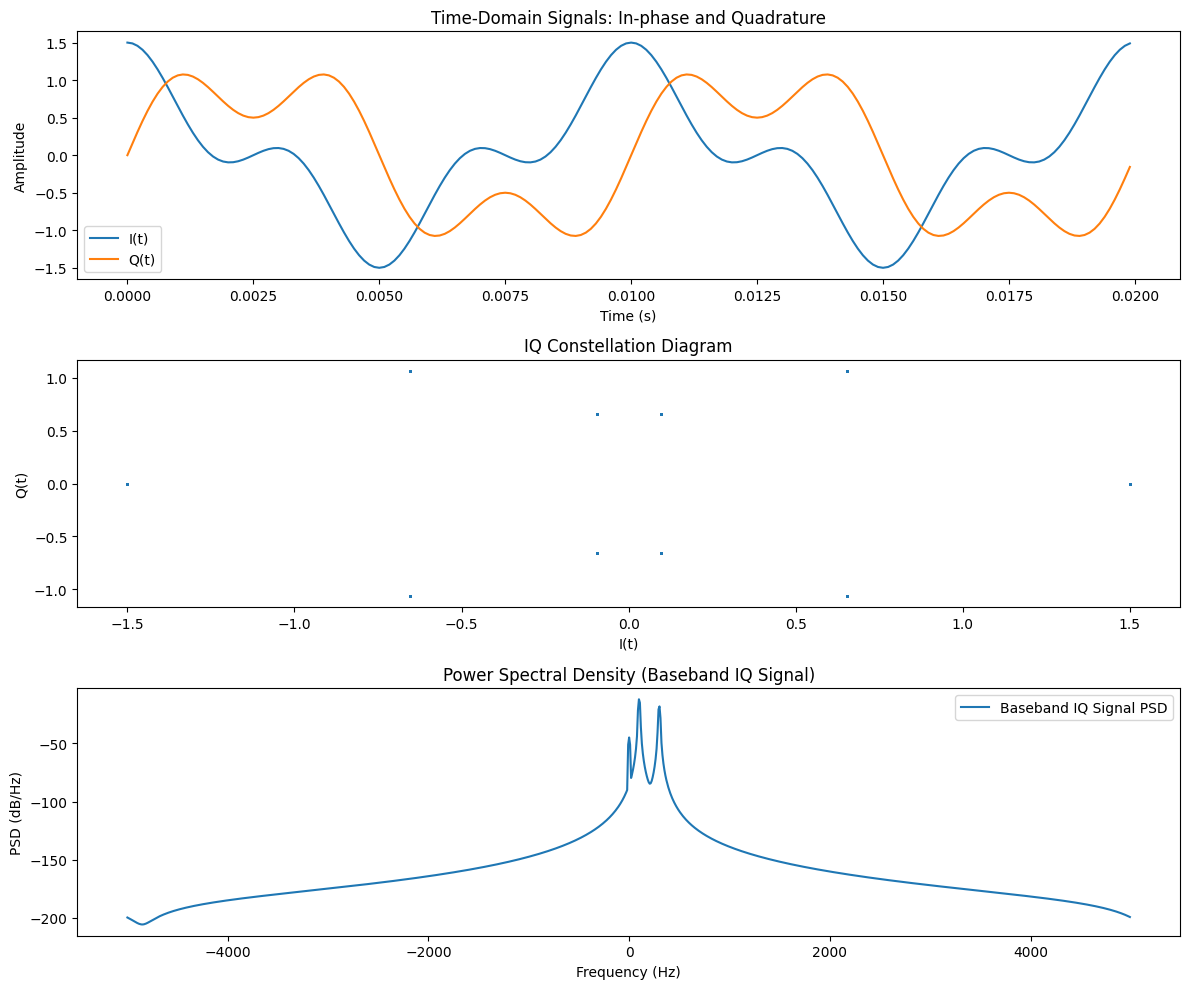

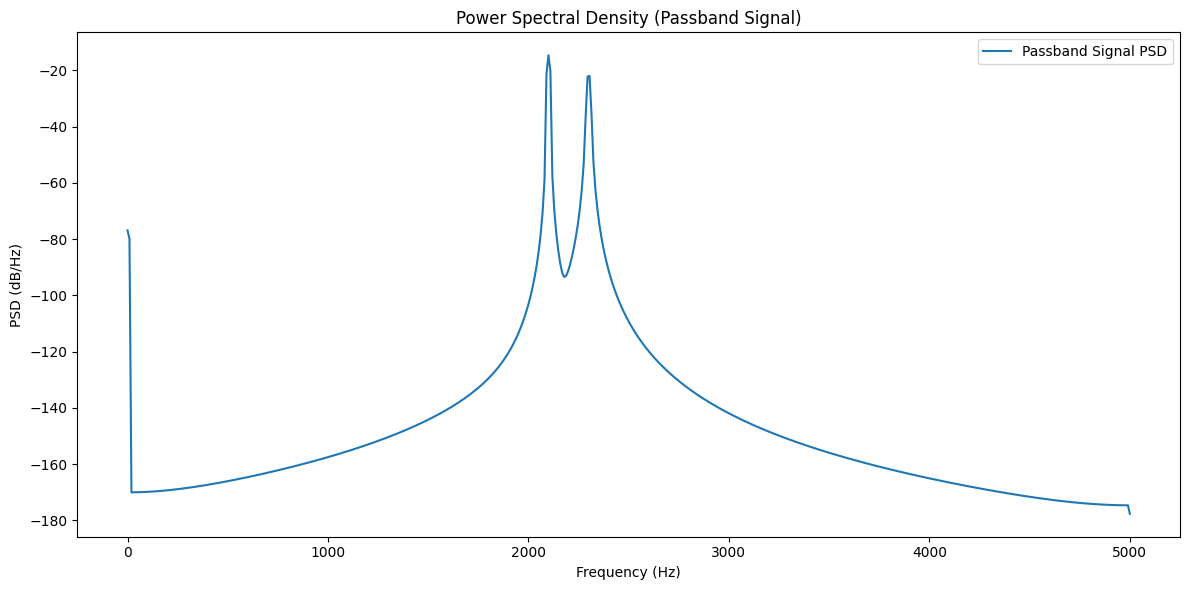

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Signal and System Parameters
# =============================================================================

# Sampling frequency and duration
fs = 10000            # Sampling frequency in Hz
T = 1.0               # Total signal duration in seconds
t = np.arange(0, T, 1/fs)  # Time vector

# Baseband signal parameters: two tones to illustrate spectral components.
f1 = 100   # Frequency of first tone (Hz)
f2 = 300   # Frequency of second tone (Hz)

# =============================================================================
# 2. Generate the Complex Baseband (IQ) Signal
# =============================================================================

# Create the in-phase (I) and quadrature (Q) components.
# By construction, these two components form the complex IQ signal.
I = np.cos(2 * np.pi * f1 * t) + 0.5 * np.cos(2 * np.pi * f2 * t)
Q = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
x_IQ = I + 1j * Q

# =============================================================================
# 3. Create the Passband Signal from the IQ Signal
# =============================================================================

# Carrier frequency for modulation to the RF (passband) domain.
fc = 2000   # Carrier frequency in Hz

# Modulate the baseband IQ signal to produce the real-valued passband signal.
# This uses the relation:
#   x_PB(t) = Re{ x_IQ(t) * exp(j 2π fc t) }
x_PB = np.real(x_IQ * np.exp(1j * 2 * np.pi * fc * t))

# =============================================================================
# 4. Estimate the Power Spectral Density (PSD)
# =============================================================================

# For the complex IQ signal, we will compute a two-sided PSD using Welch's method.
# Note: Since the IQ signal is complex, we use return_onesided=False.
f_iq, Pxx_iq = welch(x_IQ, fs=fs, nperseg=1024, return_onesided=False)

# Shift the frequency axis for proper plotting of the two-sided spectrum.
f_iq = np.fft.fftshift(f_iq)
Pxx_iq = np.fft.fftshift(Pxx_iq)

# For the real passband signal, we use the one-sided PSD (default) from Welch's method.
f_pb, Pxx_pb = welch(x_PB, fs=fs, nperseg=1024)

# =============================================================================
# 5. Visualizations
# =============================================================================

# Create a figure with multiple subplots to display time-domain and IQ constellation.
plt.figure(figsize=(12, 10))

# Plot the in-phase and quadrature components over a short time interval to show details.
plt.subplot(3, 1, 1)
short_samples = slice(0, 200)  # show first 200 samples for clarity
plt.plot(t[short_samples], I[short_samples], label='I(t)')
plt.plot(t[short_samples], Q[short_samples], label='Q(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signals: In-phase and Quadrature')
plt.legend()

# Plot the IQ constellation diagram.
plt.subplot(3, 1, 2)
# Plot a scatter of the IQ points (using every 10th sample for clarity).
plt.scatter(np.real(x_IQ[::10]), np.imag(x_IQ[::10]), s=1)
plt.xlabel('I(t)')
plt.ylabel('Q(t)')
plt.title('IQ Constellation Diagram')

# Plot the PSD of the IQ (baseband) signal.
plt.subplot(3, 1, 3)
plt.plot(f_iq, 10 * np.log10(Pxx_iq), label='Baseband IQ Signal PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.title('Power Spectral Density (Baseband IQ Signal)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the PSD of the passband signal separately.
plt.figure(figsize=(12, 6))
plt.plot(f_pb, 10 * np.log10(Pxx_pb), label='Passband Signal PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.title('Power Spectral Density (Passband Signal)')
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 6. Explanatory Comments (Concept Recap)
# =============================================================================
#
# The program above demonstrates:
#
# - **IQ Signal Representation:** We represent a bandpass RF signal using its in-phase (I)
#   and quadrature (Q) components. The IQ signal is a complex-valued baseband representation.
#
# - **Passband Signal Construction:** By multiplying the IQ signal with a carrier (exp(j2π fc t))
#   and taking the real part, we reconstruct the real-valued passband signal.
#
# - **Power Spectral Density (PSD):** We estimate the PSD using Welch’s method, which averages
#   multiple periodograms to reduce variance. For the IQ signal, a two-sided spectrum is needed
#   (since the signal is complex), while the passband signal uses a one-sided PSD (as it is real).
#
# - **Digital Signal Processing (DSP):** The code simulates the processing steps in DSP,
#   including sampling, windowing (inside welch()), FFT-based spectral estimation, and frequency
#   shifting for proper display of the spectral content.
#
# These simulation and visualization steps connect the formal theory—like the Wiener–Khinchin
# theorem and the definition of PSD—to practical DSP methods used in RF communications.


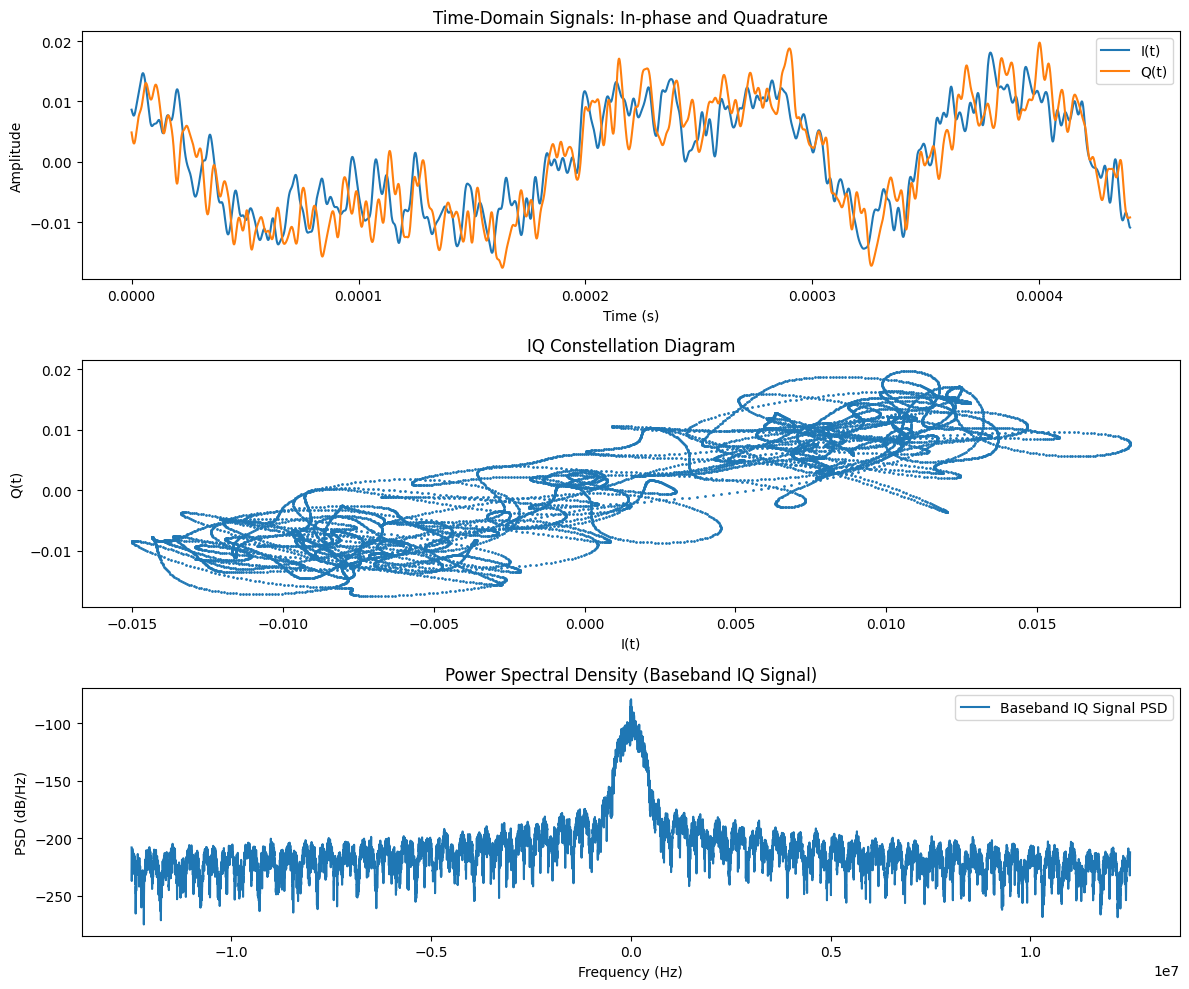

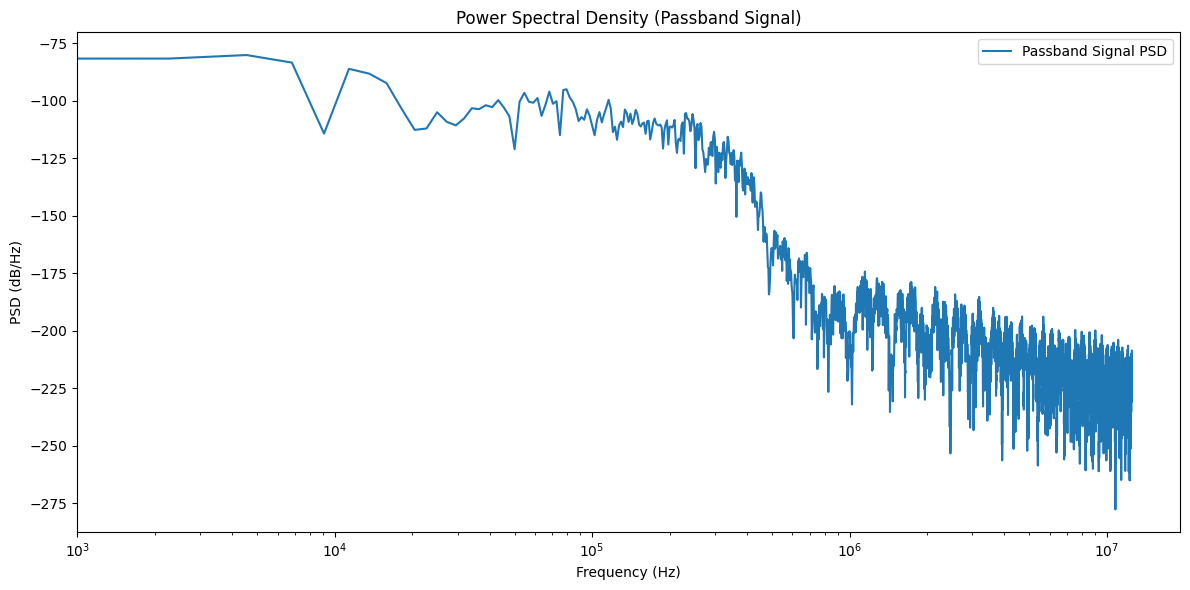

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Signal and System Parameters
# =============================================================================


# Obtain I[0] and Q[1] signals
iq_signal = samples[sample,:,]
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

I = i_signal
Q = q_signal

# Sampling frequency and duration
fs = 25e6  #sample_frequency
N = 11000  # Total number of samples
t = np.arange(N) / fs

# =============================================================================
# 2. Generate the Complex Baseband (IQ) Signal
# =============================================================================

x_IQ = I + 1j * Q

# =============================================================================
# 3. Create the Passband Signal from the IQ Signal
# =============================================================================

# Carrier frequency for modulation to the RF (passband) domain.
fc = 1.6165e6   # Carrier frequency in Hz
fc = 0
# Modulate the baseband IQ signal to produce the real-valued passband signal.
# This uses the relation:
#   x_PB(t) = Re{ x_IQ(t) * exp(j 2π fc t) }
x_PB = np.real(x_IQ * np.exp(1j * 2 * np.pi * fc * t))

# =============================================================================
# 4. Estimate the Power Spectral Density (PSD)
# =============================================================================

# For the complex IQ signal, we will compute a two-sided PSD using Welch's method.
# Note: Since the IQ signal is complex, we use return_onesided=False.
f_iq, Pxx_iq = welch(x_IQ, fs=fs, nperseg=max(1024, len(I)), return_onesided=False)

# Shift the frequency axis for proper plotting of the two-sided spectrum.
f_iq = np.fft.fftshift(f_iq)
Pxx_iq = np.fft.fftshift(Pxx_iq)

# For the real passband signal, we use the one-sided PSD (default) from Welch's method.
f_pb, Pxx_pb = welch(x_PB, fs=fs, nperseg=max(1024, len(I)))

# =============================================================================
# 5. Visualizations
# =============================================================================

# Create a figure with multiple subplots to display time-domain and IQ constellation.
plt.figure(figsize=(12, 10))

# Plot the in-phase and quadrature components over a short time interval to show details.
plt.subplot(3, 1, 1)
short_samples = slice(0, len(t))  # show first 200 samples for clarity
plt.plot(t[short_samples], I[short_samples], label='I(t)')
plt.plot(t[short_samples], Q[short_samples], label='Q(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signals: In-phase and Quadrature')
plt.legend()

# Plot the IQ constellation diagram.
plt.subplot(3, 1, 2)
# Plot a scatter of the IQ points (using every 10th sample for clarity).
plt.scatter(np.real(x_IQ[::]), np.imag(x_IQ[::]), s=1)
plt.xlabel('I(t)')
plt.ylabel('Q(t)')
plt.title('IQ Constellation Diagram')

# Plot the PSD of the IQ (baseband) signal.
plt.subplot(3, 1, 3)
plt.plot(f_iq, 10 * np.log10(Pxx_iq), label='Baseband IQ Signal PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
#plt.semilogx()
plt.title('Power Spectral Density (Baseband IQ Signal)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the PSD of the passband signal separately.
plt.figure(figsize=(12, 6))
plt.plot(f_pb, 10 * np.log10(Pxx_pb), label='Passband Signal PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.title('Power Spectral Density (Passband Signal)')
plt.semilogx()
plt.xlim(left=1e3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 6. Explanatory Comments (Concept Recap)
# =============================================================================
#
# The program above demonstrates:
#
# - **IQ Signal Representation:** We represent a bandpass RF signal using its in-phase (I)
#   and quadrature (Q) components. The IQ signal is a complex-valued baseband representation.
#
# - **Passband Signal Construction:** By multiplying the IQ signal with a carrier (exp(j2π fc t))
#   and taking the real part, we reconstruct the real-valued passband signal.
#
# - **Power Spectral Density (PSD):** We estimate the PSD using Welch’s method, which averages
#   multiple periodograms to reduce variance. For the IQ signal, a two-sided spectrum is needed
#   (since the signal is complex), while the passband signal uses a one-sided PSD (as it is real).
#
# - **Digital Signal Processing (DSP):** The code simulates the processing steps in DSP,
#   including sampling, windowing (inside welch()), FFT-based spectral estimation, and frequency
#   shifting for proper display of the spectral content.
#
# These simulation and visualization steps connect the formal theory—like the Wiener–Khinchin
# theorem and the definition of PSD—to practical DSP methods used in RF communications.


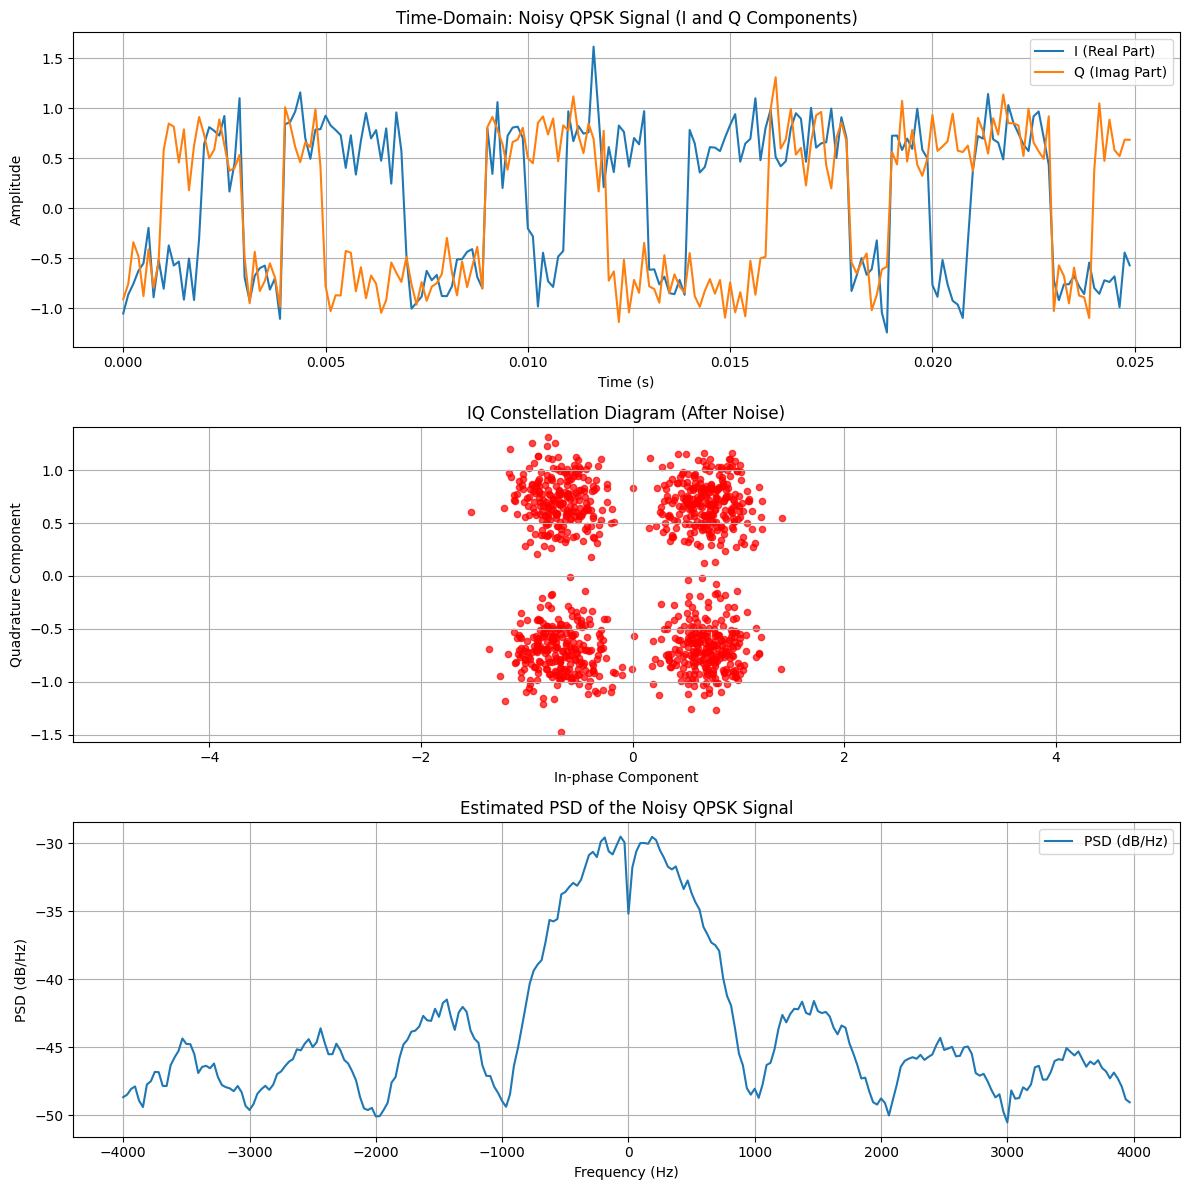

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Parameters and QPSK Symbol Generation
# =============================================================================
# Define the simulation parameters:
num_symbols = 1000         # Number of QPSK symbols to generate
samples_per_symbol = 8     # Oversampling factor (samples per QPSK symbol)
fs = 8000                  # Sampling frequency in Hz (baseband sample rate)
Ts = 1.0 / fs              # Sampling interval

# Generate random bits for QPSK modulation (2 bits per symbol)
bits = np.random.randint(0, 2, num_symbols * 2)
symbols_bits = bits.reshape(num_symbols, 2)

# Define QPSK mapping.
# We'll use Gray coding (commonly used in communications) with normalization.
#   00 -> (1 + 1j) / sqrt(2)
#   01 -> (-1 + 1j) / sqrt(2)
#   11 -> (-1 - 1j) / sqrt(2)
#   10 -> (1 - 1j) / sqrt(2)
mapping = {
    (0, 0): (1+1j),
    (0, 1): (-1+1j),
    (1, 1): (-1-1j),
    (1, 0): (1-1j)
}
# Normalize constellation points to have unit average power.
for k in mapping:
    mapping[k] /= np.sqrt(2)

# Map bits to QPSK symbols (complex baseband representation)
qpsk_symbols = np.array([mapping[tuple(b)] for b in symbols_bits])

# =============================================================================
# 2. Upsample and Create the Baseband IQ Signal with Pulse Shaping
# =============================================================================
# For simplicity, a rectangular pulse (i.e. hold each symbol for a duration)
# is used as the pulse shaping filter.
# Upsample the signal by repeating each symbol 'samples_per_symbol' times.
baseband_signal = np.repeat(qpsk_symbols, samples_per_symbol)

# Create a time vector for the baseband signal.
t = np.arange(len(baseband_signal)) * Ts

# =============================================================================
# 3. Add AWGN Noise to the Baseband Signal
# =============================================================================
# Define the signal-to-noise ratio (SNR) in dB.
SNR_dB = 10
SNR_linear = 10**(SNR_dB/10)

# Average power of the baseband signal (should be ~1 after normalization).
signal_power = np.mean(np.abs(baseband_signal)**2)

# Noise variance per dimension (real and imag parts are independent).
noise_variance = signal_power / SNR_linear

# Generate complex AWGN: noise is added to both the in-phase and quadrature components.
noise = np.sqrt(noise_variance/2) * (np.random.randn(len(baseband_signal)) + 1j*np.random.randn(len(baseband_signal)))
rx_signal = baseband_signal + noise  # Received noisy baseband signal

# =============================================================================
# 4. PSD Estimation Using Welch's Method
# =============================================================================
# Use Welch's method on the complex (IQ) signal.
# Note: For a complex signal, we set return_onesided=False to obtain a two-sided PSD.
f, Pxx = welch(rx_signal, fs=fs, nperseg=256, return_onesided=False)

# Shift frequency axis for proper visualization (centered at 0 Hz)
f = np.fft.fftshift(f)
Pxx = np.fft.fftshift(Pxx)

# =============================================================================
# 5. Visualizations
# =============================================================================
plt.figure(figsize=(12, 12))

# (a) Time-Domain Plot: In-Phase (I) and Quadrature (Q) Components
plt.subplot(3, 1, 1)
# Plot a short segment (first 200 samples) for clarity.
short_slice = slice(0, 200)
plt.plot(t[short_slice], np.real(rx_signal[short_slice]), label='I (Real Part)')
plt.plot(t[short_slice], np.imag(rx_signal[short_slice]), label='Q (Imag Part)')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain: Noisy QPSK Signal (I and Q Components)")
plt.legend()
plt.grid(True)

# (b) IQ Constellation Diagram
plt.subplot(3, 1, 2)
# To visualize the constellation, take one sample per symbol (e.g., the first sample of each symbol)
rx_symbols = rx_signal[::samples_per_symbol]
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols), s=20, color='r', alpha=0.7)
plt.xlabel("In-phase Component")
plt.ylabel("Quadrature Component")
plt.title("IQ Constellation Diagram (After Noise)")
plt.grid(True)
plt.axis('equal')

# (c) Power Spectral Density (PSD) Plot
plt.subplot(3, 1, 3)
plt.plot(f, 10 * np.log10(Pxx), label="PSD (dB/Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.title("Estimated PSD of the Noisy QPSK Signal")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


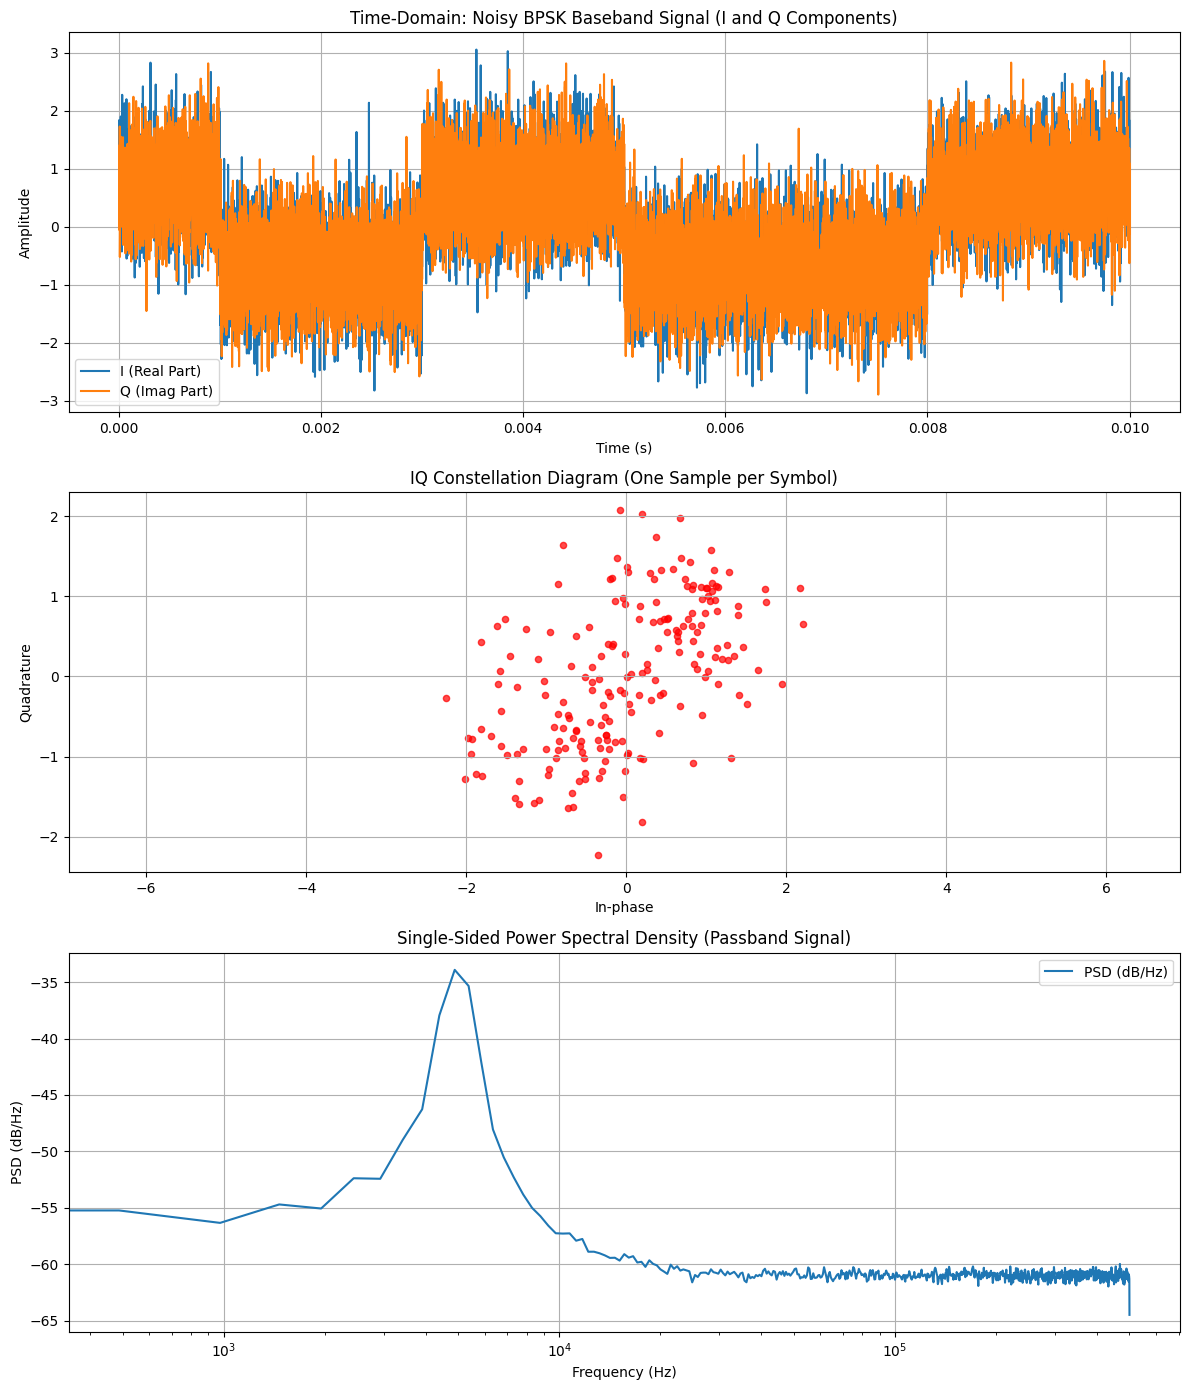

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Simulation Parameters and BPSK Symbol Generation
# =============================================================================
num_symbols = 200                   # Number of BPSK symbols (fewer symbols due to high oversampling)
samples_per_symbol = 1000           # Oversampling factor: 1000 samples per symbol

# Define the symbol rate (symbols per second). This sets the baseband sample rate.
symbol_rate = 1e3                   # For example, 1 kSymbol per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency (Hz)
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping using the custom constellation:
#   bit 0 -> (1, 1) i.e. (1 + 1j)
#   bit 1 -> (-1, -1) i.e. (-1 - 1j)
# Normalize by dividing by sqrt(2) so that the average symbol power is 1.
constellation_scaling = 1 / np.sqrt(2)
symbol_mapping = {
    0: (1 + 1j) * constellation_scaling,
    1: (-1 - 1j) * constellation_scaling
}

# Generate a random bit stream (one bit per symbol for BPSK)
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])

# =============================================================================
# 2. Upsample and Construct the Baseband IQ Signal
# =============================================================================
# Upsample by repeating each symbol 'samples_per_symbol' times.
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)

# Create the time vector for the baseband signal.
t = np.arange(len(baseband_signal)) * Ts

# =============================================================================
# 3. Add AWGN Noise to the Baseband Signal
# =============================================================================
# Define the desired SNR in dB.
SNR_dB = 1
SNR_linear = 10 ** (SNR_dB / 10)

# Signal power (the constellation is normalized, so average power ≈1).
signal_power = np.mean(np.abs(baseband_signal) ** 2)

# Noise variance per dimension (real and imaginary noise are independent).
noise_variance = signal_power / SNR_linear

# Generate complex AWGN noise.
noise = np.sqrt(noise_variance / 2) * (np.random.randn(len(baseband_signal)) 
        + 1j * np.random.randn(len(baseband_signal)))

# Received complex baseband signal with noise.
rx_baseband = baseband_signal + noise

# =============================================================================
# 4. Modulate the Noisy Baseband Signal to a Real Passband Signal
# =============================================================================
# To obtain a single-sided PSD we work with a real passband signal.
# Use a carrier frequency fc (choose fc < fs/2).
fc = 5000  # Carrier frequency in Hz

# Convert the complex baseband (IQ) signal to a real passband signal using:
# x_passband(t) = I(t)*cos(2πfc t) - Q(t)*sin(2πfc t)
I_component = np.real(rx_baseband)
Q_component = np.imag(rx_baseband)
rx_passband = I_component * np.cos(2 * np.pi * fc * t) - Q_component * np.sin(2 * np.pi * fc * t)

# =============================================================================
# 5. PSD Estimation (Single-Sided) Using Welch's Method
# =============================================================================
# For a real-valued passband signal, we can compute a one-sided PSD.
# The 'welch' function with default 'return_onesided=True' returns frequencies from 0 to fs/2.
f_psd, Pxx_psd = welch(rx_passband, fs=fs, nperseg=2048)

# =============================================================================
# 6. Visualizations
# =============================================================================
plt.figure(figsize=(12, 14))

# (a) Time-Domain Plot of the Noisy Baseband I and Q Components
plt.subplot(3, 1, 1)
# Plot only a short segment (first 2000 samples) for clarity.
short_slice = slice(0, 10000)
plt.plot(t[short_slice], np.real(rx_baseband[short_slice]), label='I (Real Part)')
plt.plot(t[short_slice], np.imag(rx_baseband[short_slice]), label='Q (Imag Part)')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain: Noisy BPSK Baseband Signal (I and Q Components)")
plt.legend()
plt.grid(True)

# (b) IQ Constellation Diagram
plt.subplot(3, 1, 2)
# For the constellation, sample one point per symbol interval (e.g., the first sample of each symbol).
rx_symbols = rx_baseband[::samples_per_symbol]
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols), s=20, color='red', alpha=0.7)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("IQ Constellation Diagram (One Sample per Symbol)")
plt.grid(True)
plt.axis('equal')

# (c) Single-Sided PSD of the Passband Signal
plt.subplot(3, 1, 3)
plt.plot(f_psd, 10 * np.log10(Pxx_psd), label="PSD (dB/Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.title("Single-Sided Power Spectral Density (Passband Signal)")
plt.legend()
plt.semilogx()
plt.grid(True)

plt.tight_layout()
plt.show()


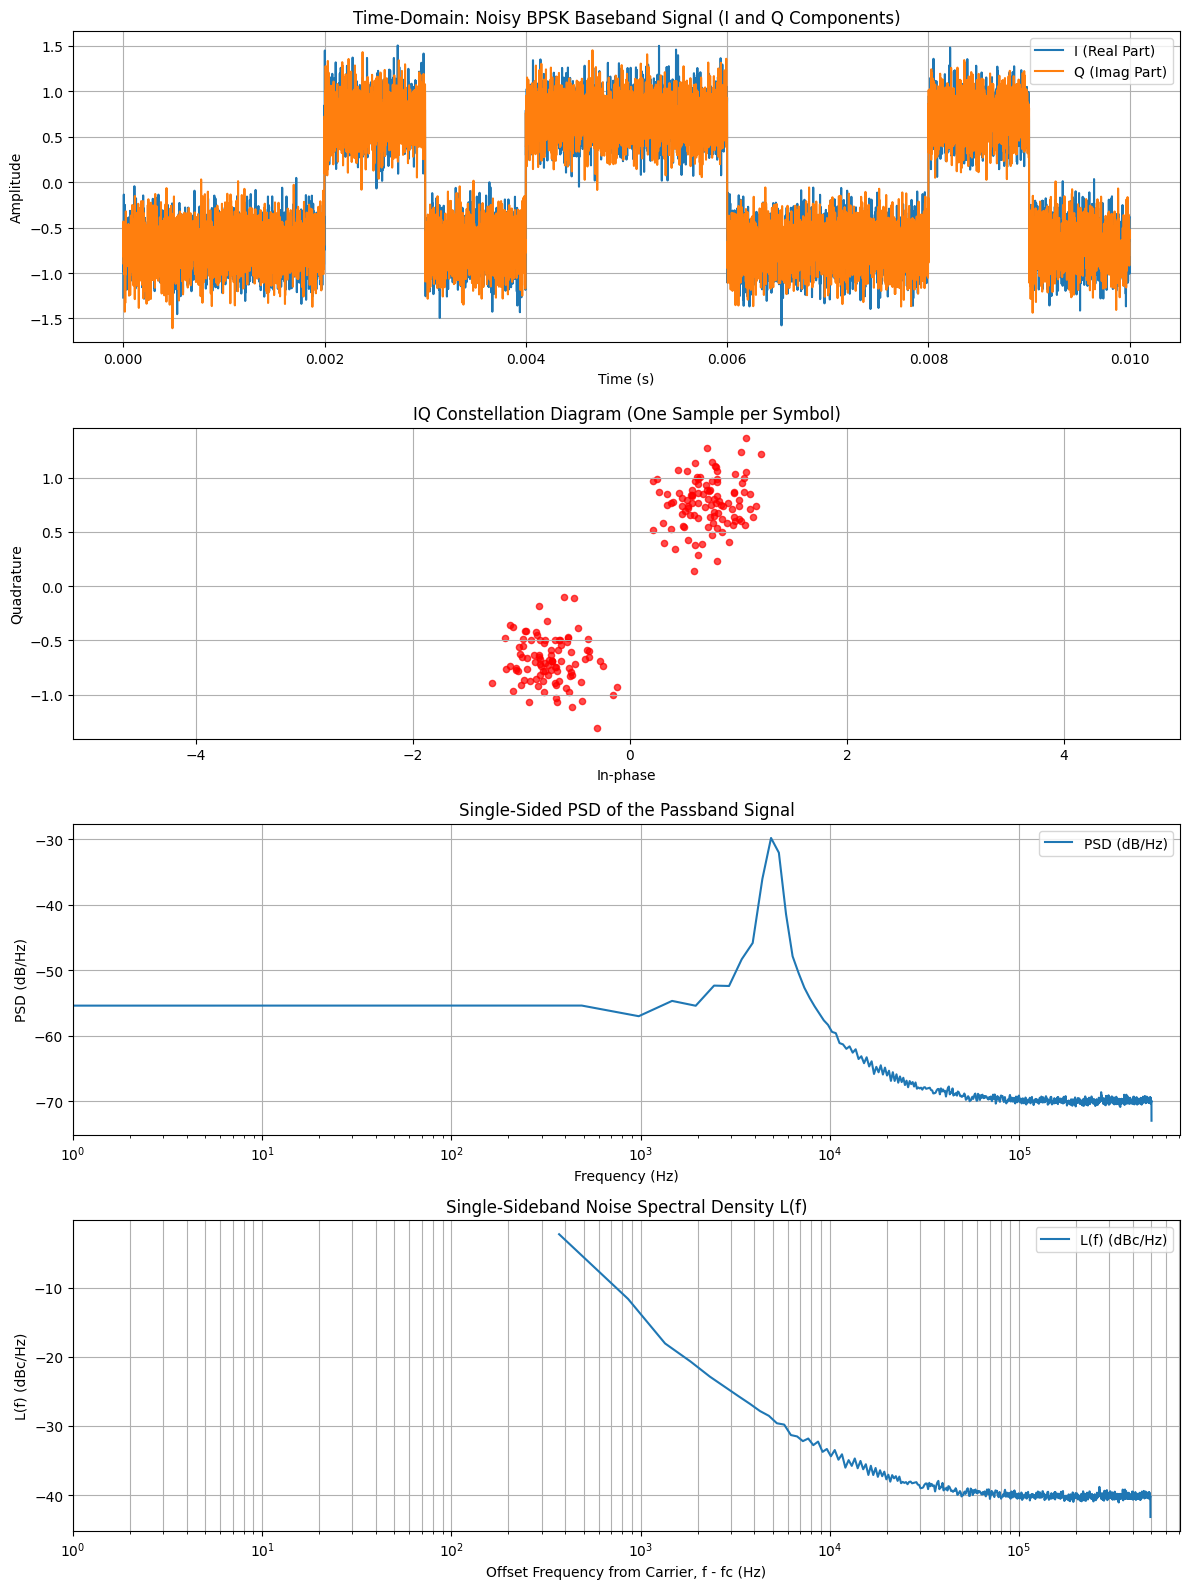

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Simulation Parameters and BPSK Symbol Generation
# =============================================================================
num_symbols = 200                   # Number of BPSK symbols (keep low because of high oversampling)
samples_per_symbol = 1000           # Oversampling factor: 1000 samples per symbol

# Define symbol rate and derive baseband sampling frequency.
symbol_rate = 1e3                   # 1 kSymbols per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency in Hz
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping with the custom constellation:
#   bit 0 -> (1, 1) i.e. 1 + 1j
#   bit 1 -> (-1, -1) i.e. -1 - 1j
# Normalize by dividing by sqrt(2) so that each symbol has unit energy.
constellation_scaling = 1 / np.sqrt(2)
symbol_mapping = {
    0: (1 + 1j) * constellation_scaling,
    1: (-1 - 1j) * constellation_scaling
}

# Generate a random bit stream (one bit per symbol for BPSK)
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])

# =============================================================================
# 2. Upsample and Construct the Baseband IQ Signal
# =============================================================================
# Upsample by repeating each symbol "samples_per_symbol" times.
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)

# Create the time vector corresponding to the baseband signal.
t = np.arange(len(baseband_signal)) * Ts

# =============================================================================
# 3. Add AWGN Noise to the Baseband Signal
# =============================================================================
SNR_dB = 10                        # Desired SNR in dB
SNR_linear = 10 ** (SNR_dB / 10)

# For our normalized constellation the average signal power is nearly 1.
signal_power = np.mean(np.abs(baseband_signal)**2)

# Noise variance (per real dimension)
noise_variance = signal_power / SNR_linear

# Generate complex AWGN noise (independent in in-phase and quadrature)
noise = np.sqrt(noise_variance / 2) * (np.random.randn(len(baseband_signal)) 
                                       + 1j * np.random.randn(len(baseband_signal)))

# Received baseband IQ signal with noise.
rx_baseband = baseband_signal + noise

# =============================================================================
# 4. Modulate the Noisy Baseband Signal to a Real Passband Signal with Pilot Carrier
# =============================================================================
# Set a carrier frequency.
fc = 5000  # Hz

# In a typical IQ modulation, the real passband is obtained as:
#   x_passband(t) = I(t)*cos(2πfc t) - Q(t)*sin(2πfc t)
I_component = np.real(rx_baseband)
Q_component = np.imag(rx_baseband)
modulated_signal = I_component * np.cos(2 * np.pi * fc * t) - Q_component * np.sin(2 * np.pi * fc * t)

# Add a pilot carrier to ensure a prominent carrier spike in the PSD.
carrier_amplitude = 1.0
carrier_signal = carrier_amplitude * np.cos(2 * np.pi * fc * t)

# The final passband signal is the sum of the modulated data and the pilot carrier.
rx_passband = carrier_signal + modulated_signal

# =============================================================================
# 5. PSD Estimation (Single-Sided) Using Welch's Method
# =============================================================================
# For a real signal, the one-sided PSD is estimated (frequencies from 0 to fs/2).
# Choose an nperseg large enough given the high sampling rate.
f_psd, Pxx_psd = welch(rx_passband, fs=fs, nperseg=2048) 

# =============================================================================
# 6. Compute the Single-Sideband Noise Spectral Density L(f)
# =============================================================================
# L(f) is defined here as the ratio in dBc/Hz of the noise PSD to the carrier power.
# We first locate the carrier peak. We assume the highest spectral line near fc is the carrier.
# Note: In a well-designed measurement, you might further remove the carrier tone's influence.
idx_carrier = np.argmin(np.abs(f_psd - fc))
P_carrier = Pxx_psd[idx_carrier]

# Compute L(f) in dBc/Hz:
# L(f) = 10·log10(PSD(f) / P_carrier)
L_f = 10 * np.log10(Pxx_psd / P_carrier)

# For plotting, compute the offset frequency relative to the carrier.
offset_freq = f_psd - fc

# For typical presentation, show L(f) for positive offset frequencies (e.g., > 1 Hz)
mask = offset_freq > 1  # you can adjust the lower bound as needed

# =============================================================================
# 7. Visualizations
# =============================================================================
plt.figure(figsize=(12, 16))

# (a) Time-Domain Plot of the Noisy Baseband I and Q Components
plt.subplot(4, 1, 1)
short_slice = slice(0, 10000)  # Plot a short time segment
plt.plot(t[short_slice], np.real(rx_baseband[short_slice]), label='I (Real Part)')
plt.plot(t[short_slice], np.imag(rx_baseband[short_slice]), label='Q (Imag Part)')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain: Noisy BPSK Baseband Signal (I and Q Components)")
plt.legend()
plt.grid(True)

# (b) IQ Constellation Diagram (1 Sample per Symbol)
plt.subplot(4, 1, 2)
rx_symbols = rx_baseband[::samples_per_symbol]
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols), s=20, color='red', alpha=0.7)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("IQ Constellation Diagram (One Sample per Symbol)")
plt.grid(True)
plt.axis('equal')

# (c) Single-Sided PSD of the Passband Signal (in dB/Hz)
plt.subplot(4, 1, 3)
plt.plot(f_psd, 10 * np.log10(Pxx_psd), label="PSD (dB/Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.title("Single-Sided PSD of the Passband Signal")
plt.semilogx()
plt.xlim(left=1e0)
plt.legend()
plt.grid(True)

# (d) Single-Sideband Noise Spectral Density L(f)
plt.subplot(4, 1, 4)
# Plot L(f) versus offset frequency from the carrier on a log-log scale.
plt.semilogx(offset_freq[mask], L_f[mask], label="L(f) (dBc/Hz)")
plt.xlabel("Offset Frequency from Carrier, f - fc (Hz)")
plt.ylabel("L(f) (dBc/Hz)")
plt.title("Single-Sideband Noise Spectral Density L(f)")
plt.legend()
plt.semilogx()
plt.xlim(left=1e0)
plt.grid(True, which="both")

plt.tight_layout()
plt.show()





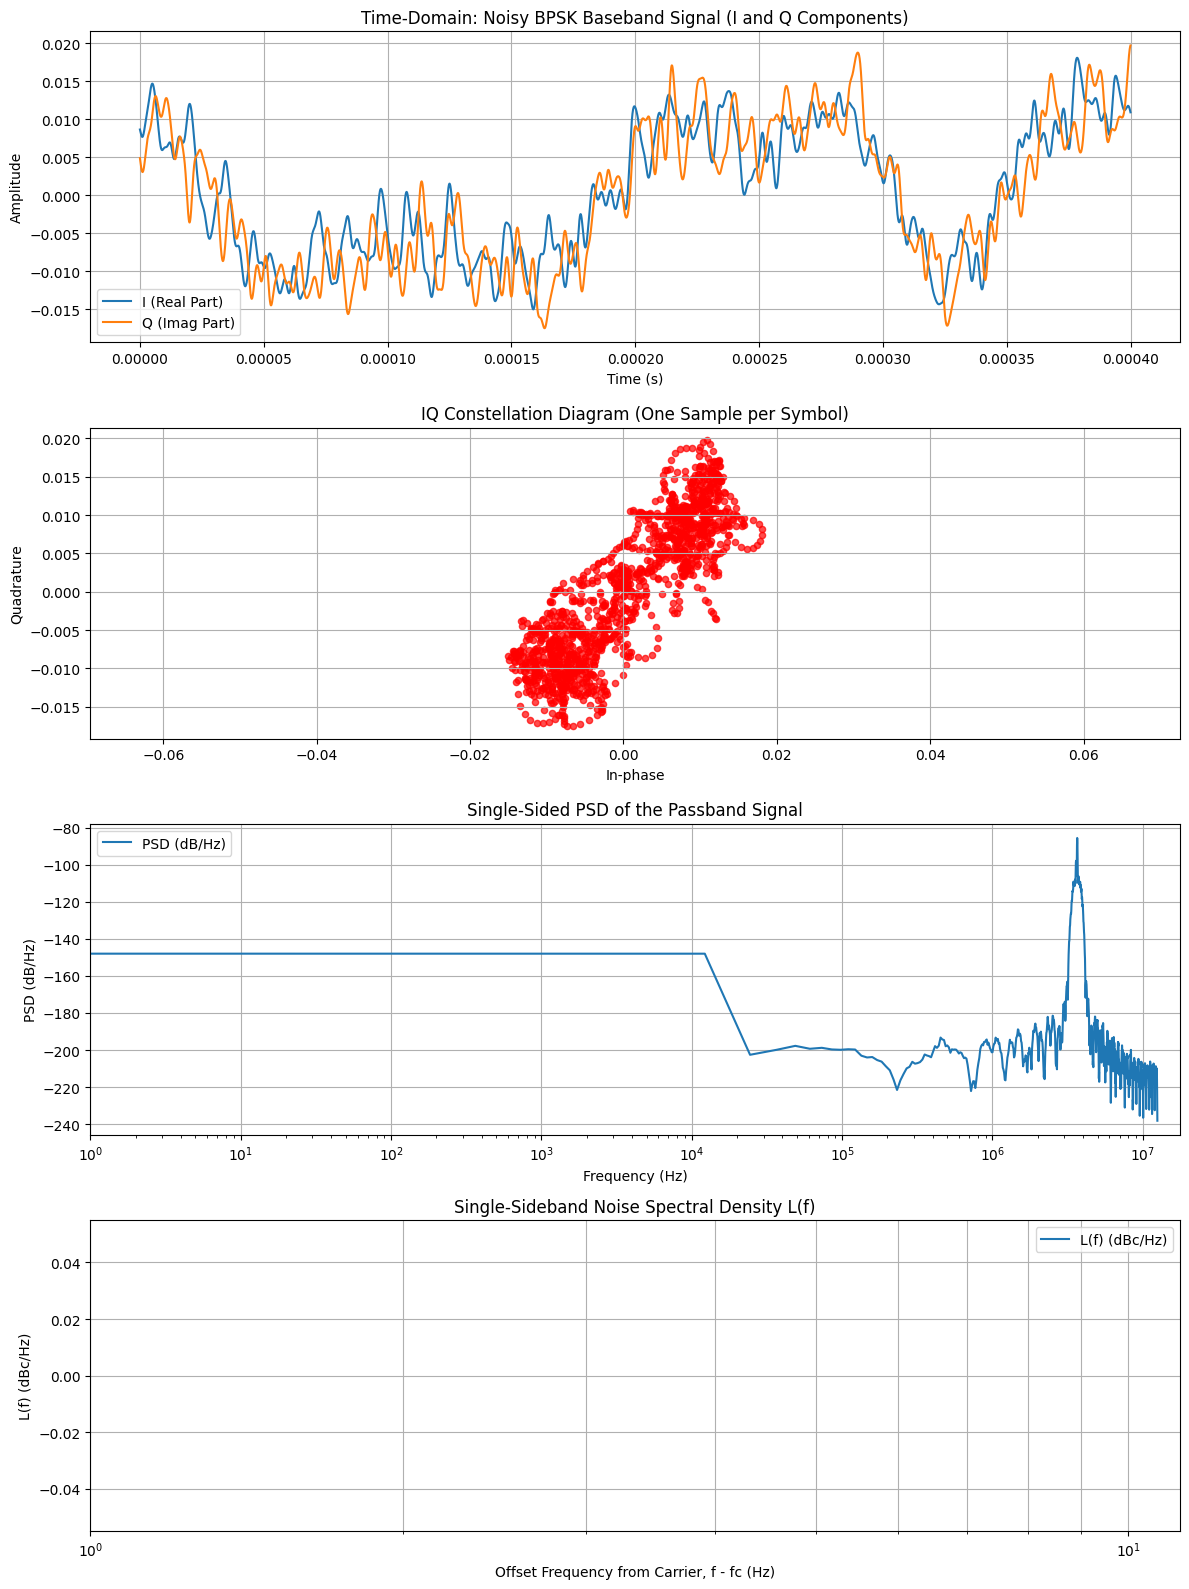

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Signal and System Parameters
# =============================================================================


# Obtain I[0] and Q[1] signals
iq_signal = samples[sample,:,]
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

I = i_signal
Q = q_signal

# Sampling frequency and duration
fs = 25e6  #sample_frequency
N = 11000  # Total number of samples
t = np.arange(N) / fs

# =============================================================================
# 2. Generate the Complex Baseband (IQ) Signal
# =============================================================================

rx_baseband = I + 1j * Q

# =============================================================================
# 3. Create the Passband Signal from the IQ Signal
# =============================================================================

# Carrier frequency for modulation to the RF (passband) domain.
fc = 1621336576   # Carrier frequency in Hz

# Modulate the baseband IQ signal to produce the real-valued passband signal.
# This uses the relation:
#   x_PB(t) = Re{ x_IQ(t) * exp(j 2π fc t) }
rx_passband = np.real(x_IQ * np.exp(1j * 2 * np.pi * fc * t))




# =============================================================================
# 5. PSD Estimation (Single-Sided) Using Welch's Method
# =============================================================================
# For a real signal, the one-sided PSD is estimated (frequencies from 0 to fs/2).
# Choose an nperseg large enough given the high sampling rate.
f_psd, Pxx_psd = welch(rx_passband, fs=fs, nperseg=2048) 

# =============================================================================
# 6. Compute the Single-Sideband Noise Spectral Density L(f)
# =============================================================================
# L(f) is defined here as the ratio in dBc/Hz of the noise PSD to the carrier power.
# We first locate the carrier peak. We assume the highest spectral line near fc is the carrier.
# Note: In a well-designed measurement, you might further remove the carrier tone's influence.
idx_carrier = np.argmin(np.abs(f_psd - fc))
P_carrier = Pxx_psd[idx_carrier]

# Compute L(f) in dBc/Hz:
# L(f) = 10·log10(PSD(f) / P_carrier)
L_f = 10 * np.log10(Pxx_psd / P_carrier)

# For plotting, compute the offset frequency relative to the carrier.
offset_freq = f_psd - fc

# For typical presentation, show L(f) for positive offset frequencies (e.g., > 1 Hz)
mask = offset_freq > 1  # you can adjust the lower bound as needed

# =============================================================================
# 7. Visualizations
# =============================================================================
plt.figure(figsize=(12, 16))

# (a) Time-Domain Plot of the Noisy Baseband I and Q Components
plt.subplot(4, 1, 1)
short_slice = slice(0, 10000)  # Plot a short time segment
plt.plot(t[short_slice], np.real(rx_baseband[short_slice]), label='I (Real Part)')
plt.plot(t[short_slice], np.imag(rx_baseband[short_slice]), label='Q (Imag Part)')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain: Noisy BPSK Baseband Signal (I and Q Components)")
plt.legend()
plt.grid(True)

# (b) IQ Constellation Diagram (1 Sample per Symbol)
plt.subplot(4, 1, 2)
rx_symbols = rx_baseband[::samples_per_symbol]
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols), s=20, color='red', alpha=0.7)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("IQ Constellation Diagram (One Sample per Symbol)")
plt.grid(True)
plt.axis('equal')

# (c) Single-Sided PSD of the Passband Signal (in dB/Hz)
plt.subplot(4, 1, 3)
plt.plot(f_psd, 10 * np.log10(Pxx_psd), label="PSD (dB/Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.title("Single-Sided PSD of the Passband Signal")
plt.semilogx()
plt.xlim(left=1e0)
plt.legend()
plt.grid(True)

# (d) Single-Sideband Noise Spectral Density L(f)
plt.subplot(4, 1, 4)
# Plot L(f) versus offset frequency from the carrier on a log-log scale.
plt.semilogx(offset_freq[mask], L_f[mask], label="L(f) (dBc/Hz)")
plt.xlabel("Offset Frequency from Carrier, f - fc (Hz)")
plt.ylabel("L(f) (dBc/Hz)")
plt.title("Single-Sideband Noise Spectral Density L(f)")
plt.legend()
plt.semilogx()
plt.xlim(left=1e0)
plt.grid(True, which="both")

plt.tight_layout()
plt.show()


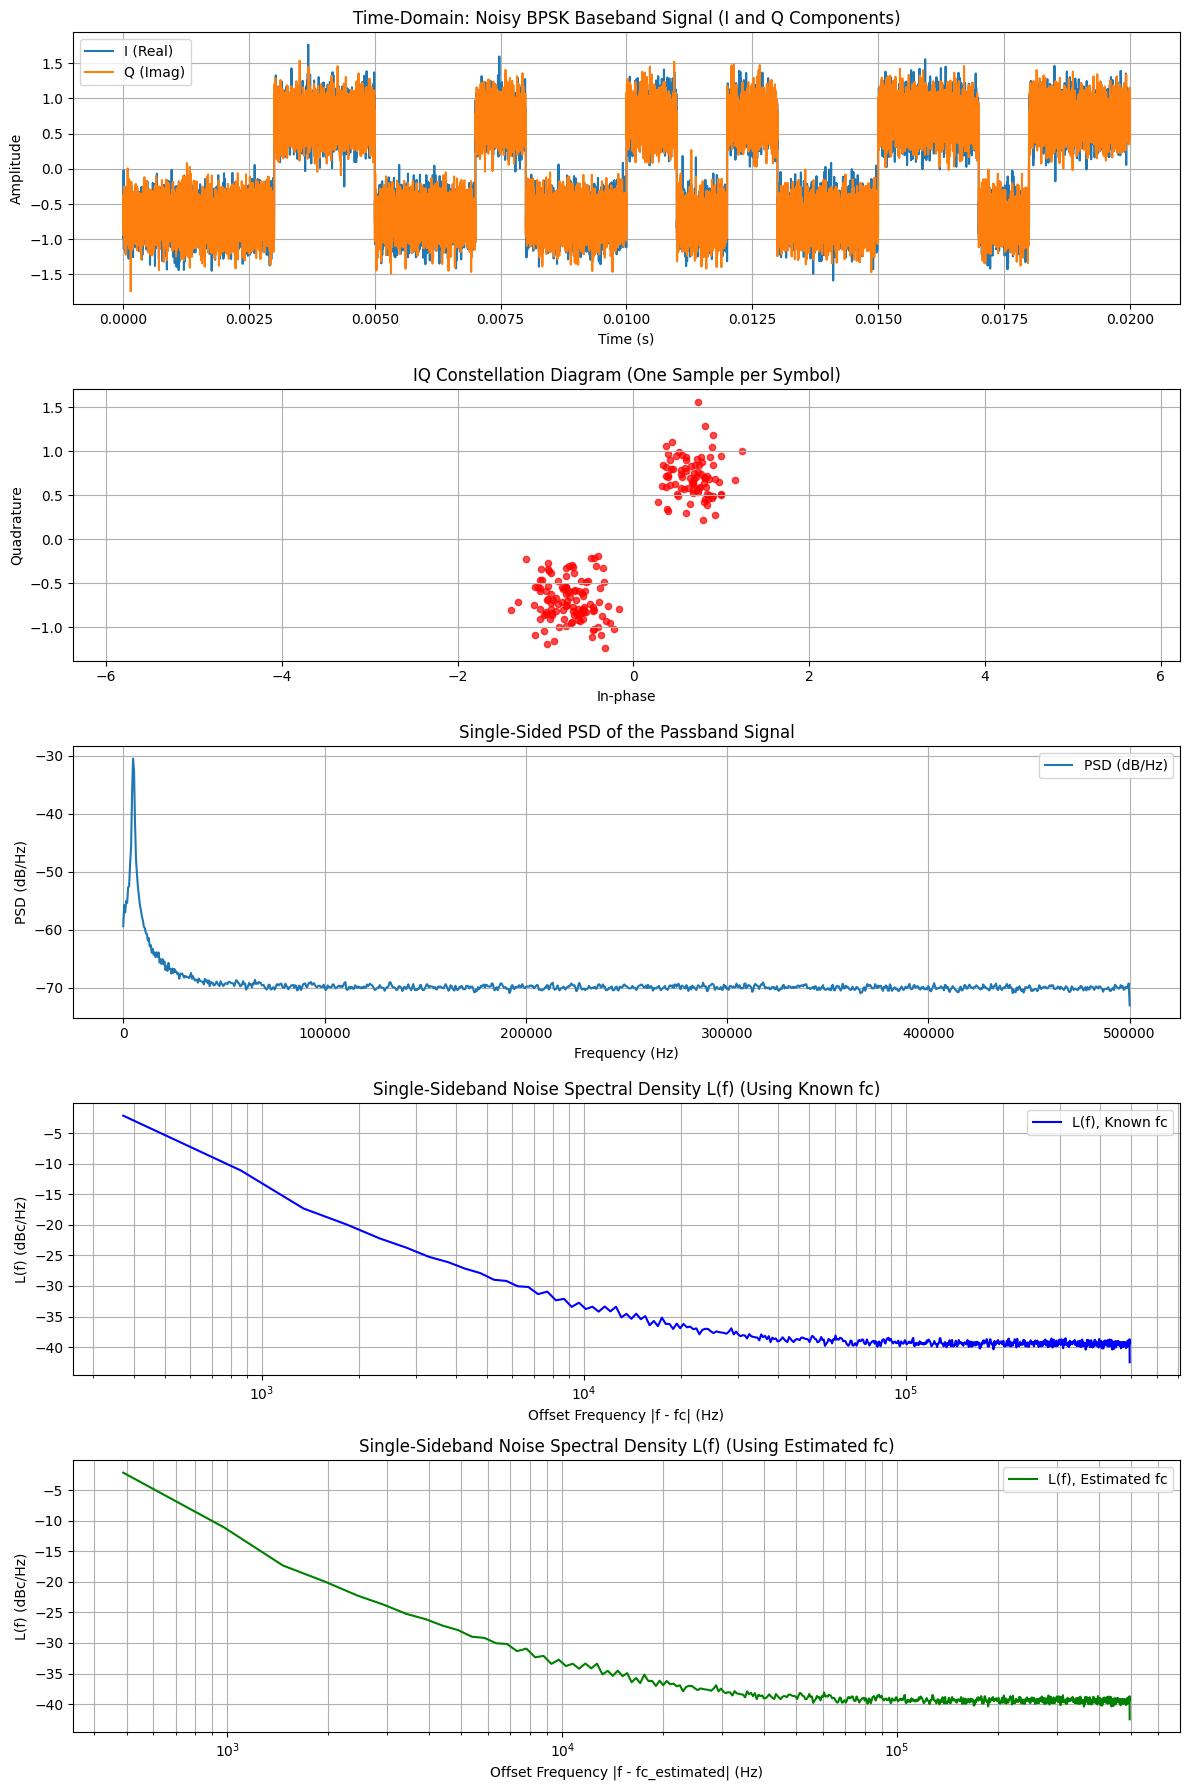

Known fc: 5000 Hz
Estimated fc: 4882.81 Hz


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# =============================================================================
# 1. Simulation Parameters and BPSK Symbol Generation
# =============================================================================
num_symbols = 200                   # Number of BPSK symbols
samples_per_symbol = 1000           # Oversampling factor: 1000 samples per symbol

# Symbol rate and baseband sampling frequency:
symbol_rate = 1e3                   # 1 kSymbol per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency (Hz)
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping with the custom constellation:
#   bit 0 -> (1, 1) i.e. 1 + 1j
#   bit 1 -> (-1, -1) i.e. -1 - 1j
# Normalize by dividing by sqrt(2) so that each symbol has unit energy.
constellation_scaling = 1 / np.sqrt(2)
symbol_mapping = {
    0: (1 + 1j) * constellation_scaling,
    1: (-1 - 1j) * constellation_scaling
}

# Generate a random bit stream (1 bit per symbol for BPSK) and map to symbols
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])

# =============================================================================
# 2. Upsample and Construct the Baseband IQ Signal
# =============================================================================
# Upsample by repeating each symbol 'samples_per_symbol' times.
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)
t = np.arange(len(baseband_signal)) * Ts  # Time vector for the baseband signal

# =============================================================================
# 3. Add AWGN Noise to the Baseband Signal
# =============================================================================
SNR_dB = 10                        # SNR in dB
SNR_linear = 10 ** (SNR_dB / 10)

# For our normalized constellation, average power ≈ 1.
signal_power = np.mean(np.abs(baseband_signal)**2)
noise_variance = signal_power / SNR_linear   # Variance per real dimension

# Generate complex AWGN (independent for real and imaginary parts)
noise = np.sqrt(noise_variance / 2) * (np.random.randn(len(baseband_signal)) +
                                       1j * np.random.randn(len(baseband_signal)))
rx_baseband = baseband_signal + noise  # Received noisy baseband signal

# =============================================================================
# 4. Modulate the Noisy Baseband Signal to a Real Passband Signal with Pilot Carrier
# =============================================================================
# Choose a carrier frequency (known condition)
fc_known = 5000  # Hz

# Standard IQ modulation to obtain a real passband signal:
#   x_passband(t) = I(t)*cos(2πfc t) - Q(t)*sin(2πfc t)
I_component = np.real(rx_baseband)
Q_component = np.imag(rx_baseband)
modulated_signal = I_component * np.cos(2 * np.pi * fc_known * t) - Q_component * np.sin(2 * np.pi * fc_known * t)

# Add a pilot carrier (with amplitude 1.0) to obtain a clear carrier spike:
carrier_amplitude = 1.0
pilot_carrier = carrier_amplitude * np.cos(2 * np.pi * fc_known * t)

# The final passband signal (with pilot carrier added)
rx_passband = pilot_carrier + modulated_signal

# =============================================================================
# 5. PSD Estimation Using Welch's Method (Single-Sided)
# =============================================================================
# For a real-valued signal, welch() returns a one-sided PSD (frequencies 0 to fs/2)
nperseg_val = 2048  # Choose a segment length (can be adjusted)
f_psd, Pxx_psd = welch(rx_passband, fs=fs, nperseg=nperseg_val)

# =============================================================================
# 6. Compute the Single-Sideband Noise Spectral Density L(f)
# =============================================================================

# --- Method 1: Known fc ---
# We use the known carrier frequency fc_known.
# Find the index where the frequency is closest to fc_known.
idx_carrier_known = np.argmin(np.abs(f_psd - fc_known))
P_carrier_known = Pxx_psd[idx_carrier_known]
# Compute L(f) = 10 log10[PSD(f) / P_carrier] (in dBc/Hz) across the spectrum.
L_f_known = 10 * np.log10(Pxx_psd / P_carrier_known)
offset_known = f_psd - fc_known  # Offset frequency with respect to fc_known

# --- Method 2: Unknown fc (Estimated fc) ---
# Here, we assume fc is not known a priori and we estimate it from the PSD.
# A simple method is to identify the frequency with the maximum power.
idx_carrier_est = np.argmax(Pxx_psd)
fc_estimated = f_psd[idx_carrier_est]
P_carrier_est = Pxx_psd[idx_carrier_est]
L_f_estimated = 10 * np.log10(Pxx_psd / P_carrier_est)
offset_estimated = f_psd - fc_estimated

# =============================================================================
# 7. Visualization: Compare Known and Unknown fc Approaches
# =============================================================================
plt.figure(figsize=(12, 18))

# (a) Time-Domain Plot of Baseband I and Q Components
plt.subplot(5, 1, 1)
short_slice = slice(0, 20000)  # Show only a short segment for clarity
plt.plot(t[short_slice], np.real(rx_baseband[short_slice]), label='I (Real)')
plt.plot(t[short_slice], np.imag(rx_baseband[short_slice]), label='Q (Imag)')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain: Noisy BPSK Baseband Signal (I and Q Components)")
plt.legend()
plt.grid(True)

# (b) IQ Constellation Diagram (1 Sample per Symbol)
plt.subplot(5, 1, 2)
rx_symbols = rx_baseband[::samples_per_symbol]
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols), s=20, color='red', alpha=0.7)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("IQ Constellation Diagram (One Sample per Symbol)")
plt.grid(True)
plt.axis('equal')

# (c) Single-Sided PSD of the Passband Signal
plt.subplot(5, 1, 3)
plt.plot(f_psd, 10 * np.log10(Pxx_psd), label="PSD (dB/Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.title("Single-Sided PSD of the Passband Signal")
plt.legend()
plt.grid(True)

# (d) Single-Sideband Noise Spectral Density L(f) [Known fc]
plt.subplot(5, 1, 4)
# We select offsets where the offset frequency is positive (e.g., > 1 Hz)
mask_known = (offset_known > 1)
plt.semilogx(np.abs(offset_known[mask_known]), L_f_known[mask_known], label="L(f), Known fc", color='blue')
plt.xlabel("Offset Frequency |f - fc| (Hz)")
plt.ylabel("L(f) (dBc/Hz)")
plt.title("Single-Sideband Noise Spectral Density L(f) (Using Known fc)")
plt.legend()
plt.grid(True, which="both")

# (e) Single-Sideband Noise Spectral Density L(f) [Estimated fc]
plt.subplot(5, 1, 5)
# Apply a mask for positive offset frequencies from the estimated carrier.
mask_est = (offset_estimated > 1)
plt.semilogx(np.abs(offset_estimated[mask_est]), L_f_estimated[mask_est], label="L(f), Estimated fc", color='green')
plt.xlabel("Offset Frequency |f - fc_estimated| (Hz)")
plt.ylabel("L(f) (dBc/Hz)")
plt.title("Single-Sideband Noise Spectral Density L(f) (Using Estimated fc)")
plt.legend()
plt.grid(True, which="both")

plt.tight_layout()
plt.show()

# Additionally, print out the known and estimated carrier frequencies for comparison:
print(f"Known fc: {fc_known} Hz")
print(f"Estimated fc: {fc_estimated:.2f} Hz")


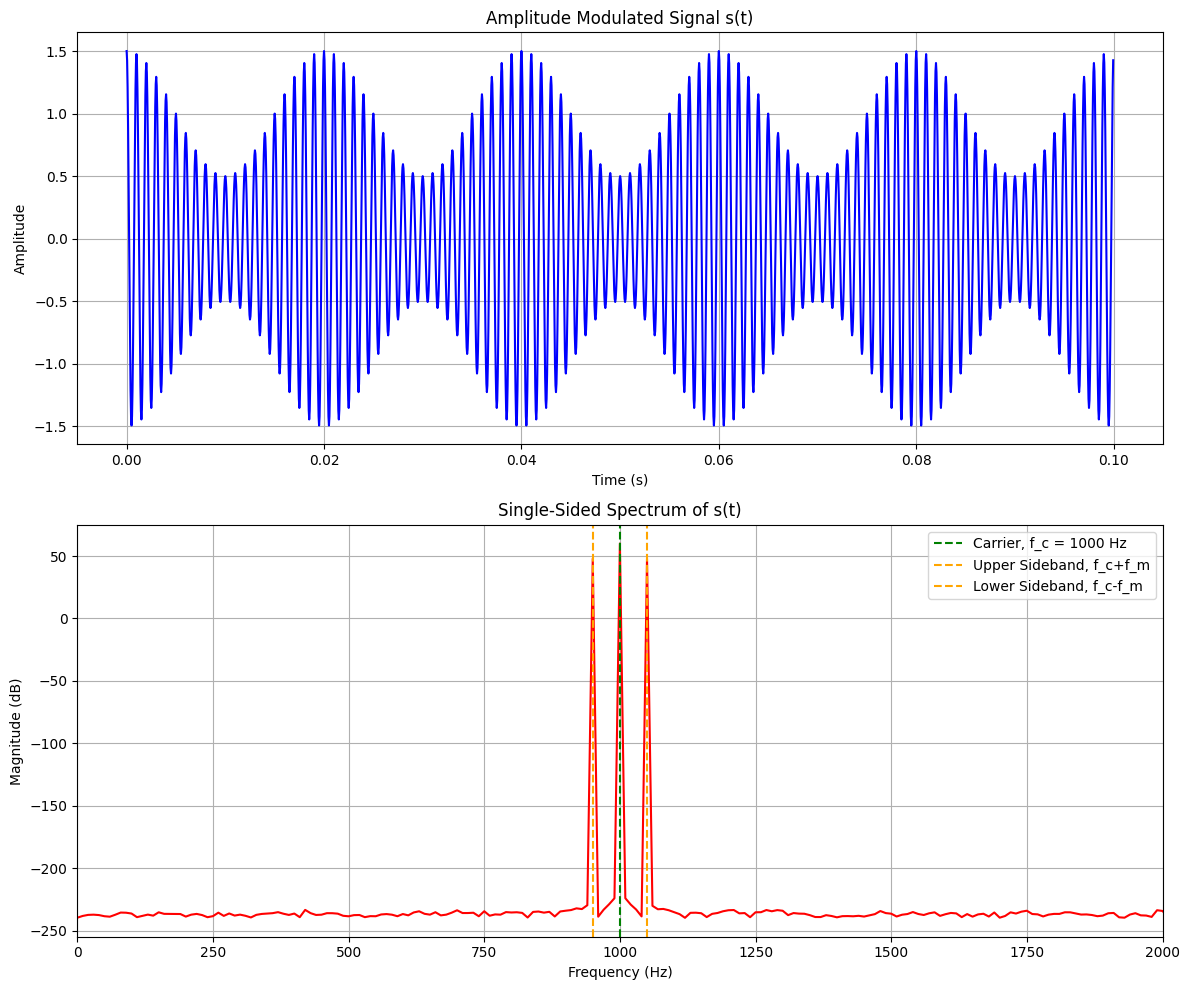

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1. Define Signal Parameters
# =============================================================================
fs = 20000               # Sampling frequency (Hz)
T = 0.1                  # Signal duration in seconds
t = np.arange(0, T, 1/fs)  # Time vector

# Carrier frequency (f_c)
fc = 1000                # Carrier frequency (Hz)

# Message signal m(t): Low-frequency cosine (modulating signal)
fm = 50                  # Frequency of the modulating signal (Hz)
m_t = 0.5 * np.cos(2 * np.pi * fm * t)  # Modulating signal amplitude (0.5 to keep modulation index < 1)

# Generate the amplitude modulated signal:
# s(t) = [1 + m(t)] * cos(2*pi*fc*t)
s_t = (1 + m_t) * np.cos(2 * np.pi * fc * t)

# =============================================================================
# 2. Compute the Frequency Spectrum (FFT)
# =============================================================================
N = len(s_t)
S_f = np.fft.fft(s_t)
# Compute frequency vector for single-sided spectrum.
freqs = np.fft.fftfreq(N, 1/fs)
# Keep only the positive half (single-sided spectrum)
mask = freqs >= 0
freqs = freqs[mask]
S_f = S_f[mask]
# Magnitude in dB (scaled appropriately)
S_db = 20 * np.log10(np.abs(S_f) + 1e-12)

# =============================================================================
# 3. Plot the Time-Domain and Frequency-Domain Graphs
# =============================================================================
plt.figure(figsize=(12, 10))

# (a) Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t, s_t, color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Amplitude Modulated Signal s(t)")
plt.grid(True)

# (b) Frequency-domain plot
plt.subplot(2, 1, 2)
plt.plot(freqs, S_db, color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Single-Sided Spectrum of s(t)")
plt.grid(True)
plt.xlim(0, 2000)

# Highlighting the carrier frequency and sidebands
plt.axvline(fc, color='green', linestyle='--', label=f'Carrier, f_c = {fc} Hz')
plt.axvline(fc + fm, color='orange', linestyle='--', label=f'Upper Sideband, f_c+f_m')
plt.axvline(np.abs(fc - fm), color='orange', linestyle='--', label=f'Lower Sideband, f_c-f_m')
plt.legend()

plt.tight_layout()
plt.show()


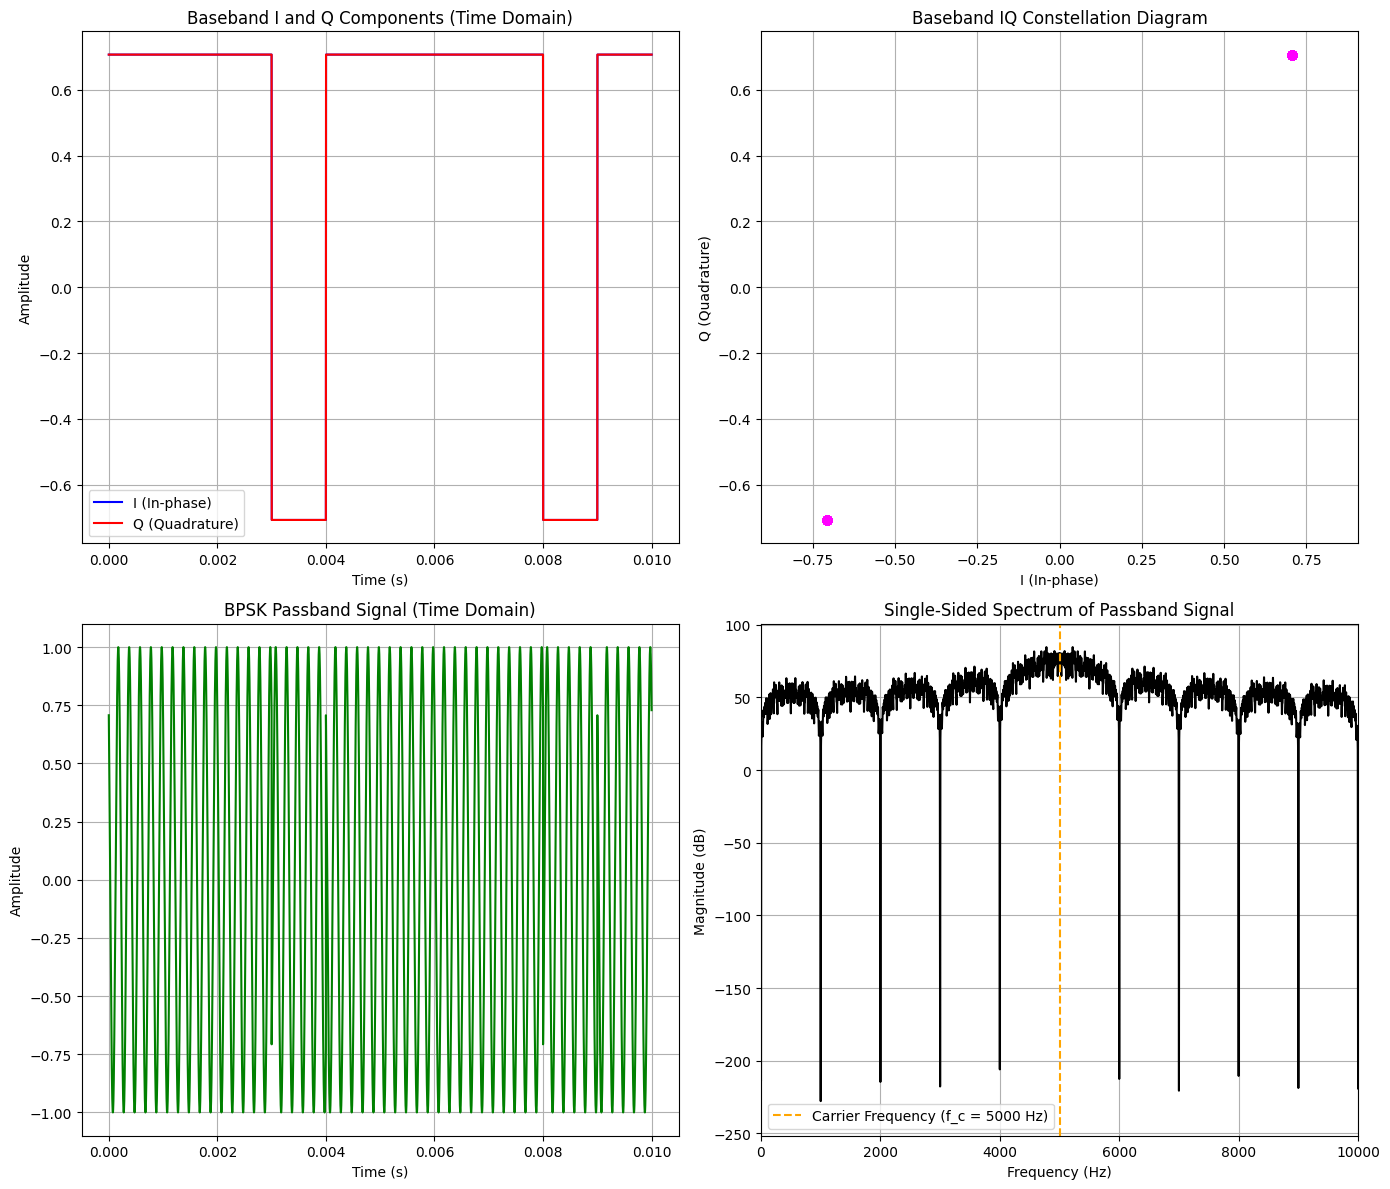

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1. Simulation Parameters and BPSK Symbol Generation
# =============================================================================
num_symbols = 200                   # Number of BPSK symbols
samples_per_symbol = 1000           # Oversampling factor: 1000 samples per symbol

# Symbol rate and derived baseband sampling frequency:
symbol_rate = 1e3                   # 1 kSymbol per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency (Hz)
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping (without noise):
# Map bit 0 to (1+1j)/sqrt(2) and bit 1 to (-1-1j)/sqrt(2) for unit energy.
constellation_scaling = 1 / np.sqrt(2)
symbol_mapping = {
    0: (1 + 1j) * constellation_scaling,
    1: (-1 - 1j) * constellation_scaling
}

# Generate a random bit stream (one bit per symbol) and map bits to symbols.
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])

# =============================================================================
# 2. Upsample and Build the Baseband IQ Signal
# =============================================================================
# Upsample by repeating each symbol "samples_per_symbol" times.
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)
t = np.arange(len(baseband_signal)) * Ts  # Time vector for the baseband signal

# Extract In-phase (I) and Quadrature (Q) components.
I_base = np.real(baseband_signal)
Q_base = np.imag(baseband_signal)

# =============================================================================
# 3. Upconvert to Passband via IQ Modulation
# =============================================================================
# Define the carrier frequency.
fc = 5000  # Carrier frequency in Hz

# Standard IQ modulation to obtain a real passband signal:
#    x_passband(t) = I(t)*cos(2πfc t) - Q(t)*sin(2πfc t)
passband_signal = I_base * np.cos(2 * np.pi * fc * t) - Q_base * np.sin(2 * np.pi * fc * t)

# =============================================================================
# 4. Frequency-Domain Analysis (Single-Sided Spectrum)
# =============================================================================
N = len(passband_signal)
S = np.fft.fft(passband_signal)
freqs = np.fft.fftfreq(N, Ts)
# Keep only the positive frequencies for the single-sided spectrum.
mask = freqs >= 0
freqs = freqs[mask]
S = S[mask]
S_db = 20 * np.log10(np.abs(S) + 1e-12)  # dB magnitude; a small constant avoids log(0)

# =============================================================================
# 5. Set k and Plot the Results
# =============================================================================
# k determines the number of samples to display in the time domain plots.
k = 10000  # change k to see more or fewer samples

plt.figure(figsize=(14, 12))

# ---- Plot 1: Baseband Time-Domain I and Q Components ----
plt.subplot(2, 2, 1)
plt.plot(t[:k], I_base[:k], label="I (In-phase)", color='blue')
plt.plot(t[:k], Q_base[:k], label="Q (Quadrature)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Baseband I and Q Components (Time Domain)")
plt.legend()
plt.grid(True)

# ---- Plot 2: IQ Constellation Diagram (Baseband) ----
plt.subplot(2, 2, 2)
# For the constellation, pick one sample per symbol (e.g., the first sample from each symbol interval)
rx_symbols = baseband_signal[::samples_per_symbol]
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols), s=40, color='magenta', alpha=0.7)
plt.xlabel("I (In-phase)")
plt.ylabel("Q (Quadrature)")
plt.title("Baseband IQ Constellation Diagram")
plt.grid(True)
plt.axis('equal')

# ---- Plot 3: Passband Signal (Time Domain) ----
plt.subplot(2, 2, 3)
plt.plot(t[:k], passband_signal[:k], color='green')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("BPSK Passband Signal (Time Domain)")
plt.grid(True)

# ---- Plot 4: Frequency-Domain Spectrum (Single-Sided) ----
plt.subplot(2, 2, 4)
plt.plot(freqs, S_db, color='black')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Single-Sided Spectrum of Passband Signal")
plt.xlim(0, 10000)
plt.grid(True)
# Mark the carrier frequency with a vertical dashed line.
plt.axvline(fc, color='orange', linestyle='--', label=f"Carrier Frequency (f_c = {fc} Hz)")
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_36474/4039812886.py:23: RuntimeWarning: divide by zero encountered in divide
  scaling = np.where(freqs == 0, 1.0, 1/np.sqrt(freqs))


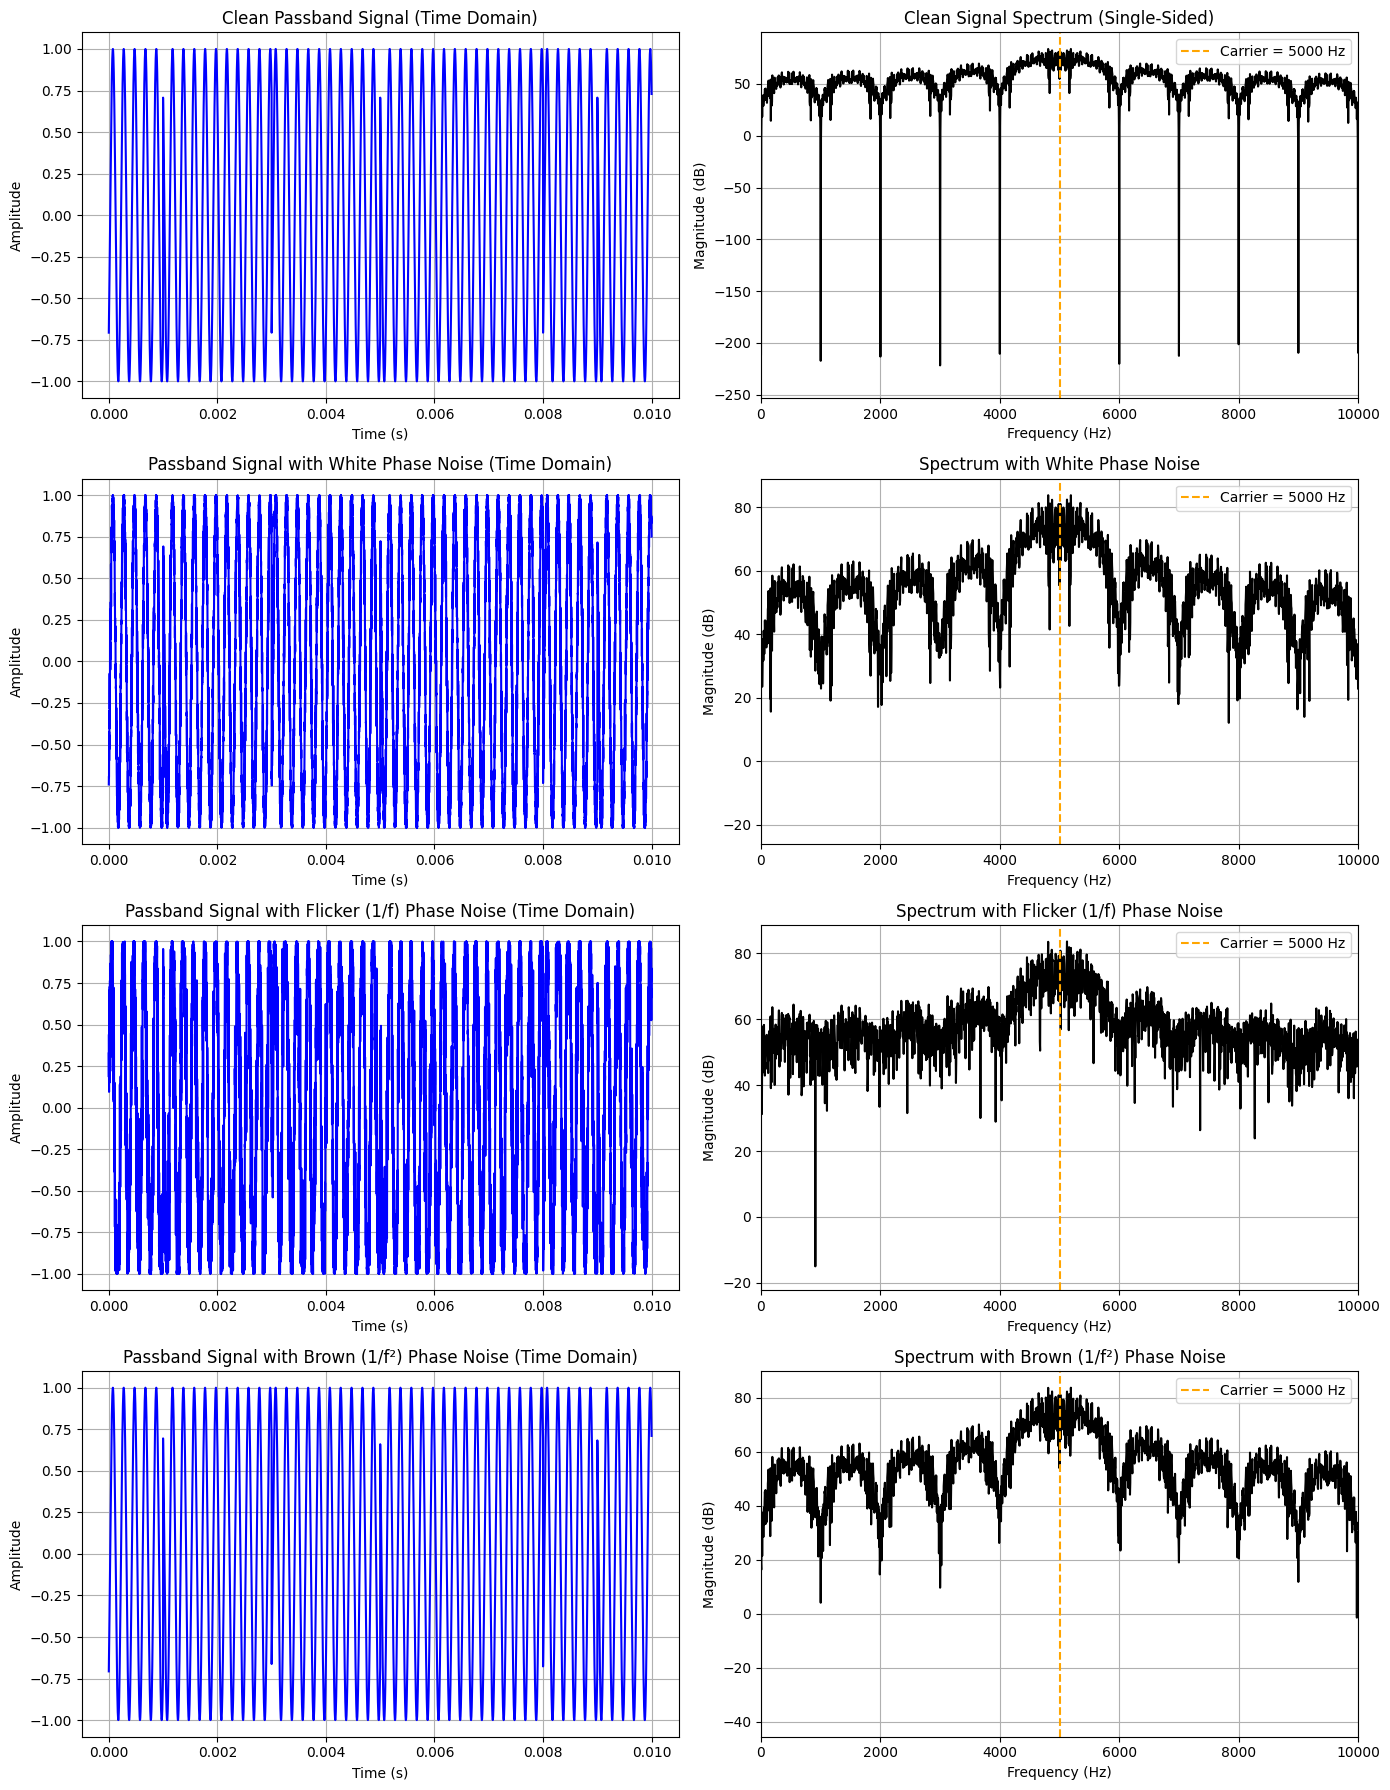

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noise(n, noise_type="white", scale=1.0):
    """
    Generate a noise time series of length n with specified spectral density.
    
    noise_type: "white", "flicker", or "brown"
        - White: flat power spectral density.
        - Flicker: ~1/f noise.
        - Brown: ~1/f² noise.
        
    scale: scaling factor (in radians) to set the noise level.
    """
    if noise_type == "white":
        noise = np.random.randn(n)
    elif noise_type == "flicker":
        # Generate pink (1/f) noise using frequency-domain shaping.
        # Create Gaussian noise, take its FFT, and scale each frequency bin.
        X = np.fft.rfft(np.random.randn(n))
        freqs = np.fft.rfftfreq(n)
        # Avoid divide-by-zero at f=0; set scaling factor = 1 there.
        scaling = np.where(freqs == 0, 1.0, 1/np.sqrt(freqs))
        X = X * scaling
        noise = np.fft.irfft(X, n)
    elif noise_type == "brown":
        # Brown (1/f²) noise may be generated as a random walk (cumulative sum of white noise)
        noise = np.cumsum(np.random.randn(n))
        noise = noise / np.std(noise)  # normalize standard deviation
    else:
        noise = np.random.randn(n)
    return noise * scale

# =============================================================================
# 1. Simulation Parameters and BPSK Symbol Generation
# =============================================================================
num_symbols = 200                   # Number of BPSK symbols
samples_per_symbol = 1000           # Oversampling factor: 1000 samples per symbol

# Symbol rate and derived baseband sampling frequency:
symbol_rate = 1e3                   # 1 kSymbol per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency (Hz)
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping (without noise):
# Map bit 0 to (1+1j)/sqrt(2) and bit 1 to (-1-1j)/sqrt(2) to have unit energy.
constellation_scaling = 1 / np.sqrt(2)
symbol_mapping = {
    0: (1 + 1j) * constellation_scaling,
    1: (-1 - 1j) * constellation_scaling
}

# Generate random bits and map to BPSK symbols.
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])

# =============================================================================
# 2. Upsample and Build the Baseband IQ Signal
# =============================================================================
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)
t = np.arange(len(baseband_signal)) * Ts

# Extract In-phase (I) and Quadrature (Q) components (clean baseband signal).
I_base = np.real(baseband_signal)
Q_base = np.imag(baseband_signal)

# =============================================================================
# 3. Create Noisy Baseband Signals by Adding Phase Noise
# =============================================================================
N = len(baseband_signal)

# Define phase noise scales (in radians); adjust as desired.
phase_noise_scale_white = 0.1    # White phase noise amplitude
phase_noise_scale_flicker = 0.1  # Flicker (1/f) phase noise amplitude
phase_noise_scale_brown = 0.1    # Brown (1/f²) phase noise amplitude

# Generate phase noise sequences.
phi_white   = generate_noise(N, "white", scale=phase_noise_scale_white)
phi_flicker = generate_noise(N, "flicker", scale=phase_noise_scale_flicker)
phi_brown   = generate_noise(N, "brown", scale=phase_noise_scale_brown)

# Add the phase noise multiplicatively to the clean baseband IQ signal.
rx_baseband_white   = baseband_signal * np.exp(1j * phi_white)
rx_baseband_flicker = baseband_signal * np.exp(1j * phi_flicker)
rx_baseband_brown   = baseband_signal * np.exp(1j * phi_brown)

# =============================================================================
# 4. Upconvert to Passband via IQ Modulation for Each Signal
# =============================================================================
# Define a carrier frequency.
fc = 5000  # Hz

# Carrier mixing function: given a (possibly noisy) baseband signal, upconvert it.
def upconvert(rx_bb, t, fc):
    I_component = np.real(rx_bb)
    Q_component = np.imag(rx_bb)
    return I_component * np.cos(2*np.pi*fc*t) - Q_component * np.sin(2*np.pi*fc*t)

# Upconverted (real passband) signals.
passband_clean   = upconvert(baseband_signal, t, fc)
passband_white   = upconvert(rx_baseband_white, t, fc)
passband_flicker = upconvert(rx_baseband_flicker, t, fc)
passband_brown   = upconvert(rx_baseband_brown, t, fc)

# =============================================================================
# 5. Frequency-Domain Analysis (Single-Sided Spectrum)
# =============================================================================
def compute_spectrum(signal, Ts):
    N = len(signal)
    S = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, Ts)
    mask = freqs >= 0
    return freqs[mask], 20 * np.log10(np.abs(S[mask]) + 1e-12)

f_clean,   S_db_clean   = compute_spectrum(passband_clean, Ts)
f_white,   S_db_white   = compute_spectrum(passband_white, Ts)
f_flicker, S_db_flicker = compute_spectrum(passband_flicker, Ts)
f_brown,   S_db_brown   = compute_spectrum(passband_brown, Ts)

# =============================================================================
# 6. Plotting
# =============================================================================
# k determines the number of time-domain samples to display.
k = 10000

# We'll produce 8 subplots arranged in 4 rows and 2 columns:
# Column 1: Time-domain (passband) plots.
# Column 2: Corresponding frequency-domain (spectrum) plots.
plt.figure(figsize=(14, 18))

# Row 1: Clean signal (no added phase noise)
plt.subplot(4,2,1)
plt.plot(t[:k], passband_clean[:k], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Clean Passband Signal (Time Domain)")
plt.grid(True)

plt.subplot(4,2,2)
plt.plot(f_clean, S_db_clean, color='black')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Clean Signal Spectrum (Single-Sided)")
plt.xlim(0, 10000)
plt.axvline(fc, color='orange', linestyle='--', label=f"Carrier = {fc} Hz")
plt.legend()
plt.grid(True)

# Row 2: Passband with White Phase Noise
plt.subplot(4,2,3)
plt.plot(t[:k], passband_white[:k], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Passband Signal with White Phase Noise (Time Domain)")
plt.grid(True)

plt.subplot(4,2,4)
plt.plot(f_white, S_db_white, color='black')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Spectrum with White Phase Noise")
plt.xlim(0, 10000)
plt.axvline(fc, color='orange', linestyle='--', label=f"Carrier = {fc} Hz")
plt.legend()
plt.grid(True)

# Row 3: Passband with Flicker (1/f) Phase Noise
plt.subplot(4,2,5)
plt.plot(t[:k], passband_flicker[:k], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Passband Signal with Flicker (1/f) Phase Noise (Time Domain)")
plt.grid(True)

plt.subplot(4,2,6)
plt.plot(f_flicker, S_db_flicker, color='black')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Spectrum with Flicker (1/f) Phase Noise")
plt.xlim(0, 10000)
plt.axvline(fc, color='orange', linestyle='--', label=f"Carrier = {fc} Hz")
plt.legend()
plt.grid(True)

# Row 4: Passband with Brown (1/f²) Phase Noise
plt.subplot(4,2,7)
plt.plot(t[:k], passband_brown[:k], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Passband Signal with Brown (1/f²) Phase Noise (Time Domain)")
plt.grid(True)

plt.subplot(4,2,8)
plt.plot(f_brown, S_db_brown, color='black')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Spectrum with Brown (1/f²) Phase Noise")
plt.xlim(0, 10000)
plt.axvline(fc, color='orange', linestyle='--', label=f"Carrier = {fc} Hz")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_36474/1026272786.py:24: RuntimeWarning: divide by zero encountered in divide
  scaling = np.where(freqs == 0, 1.0, 1/np.sqrt(freqs))


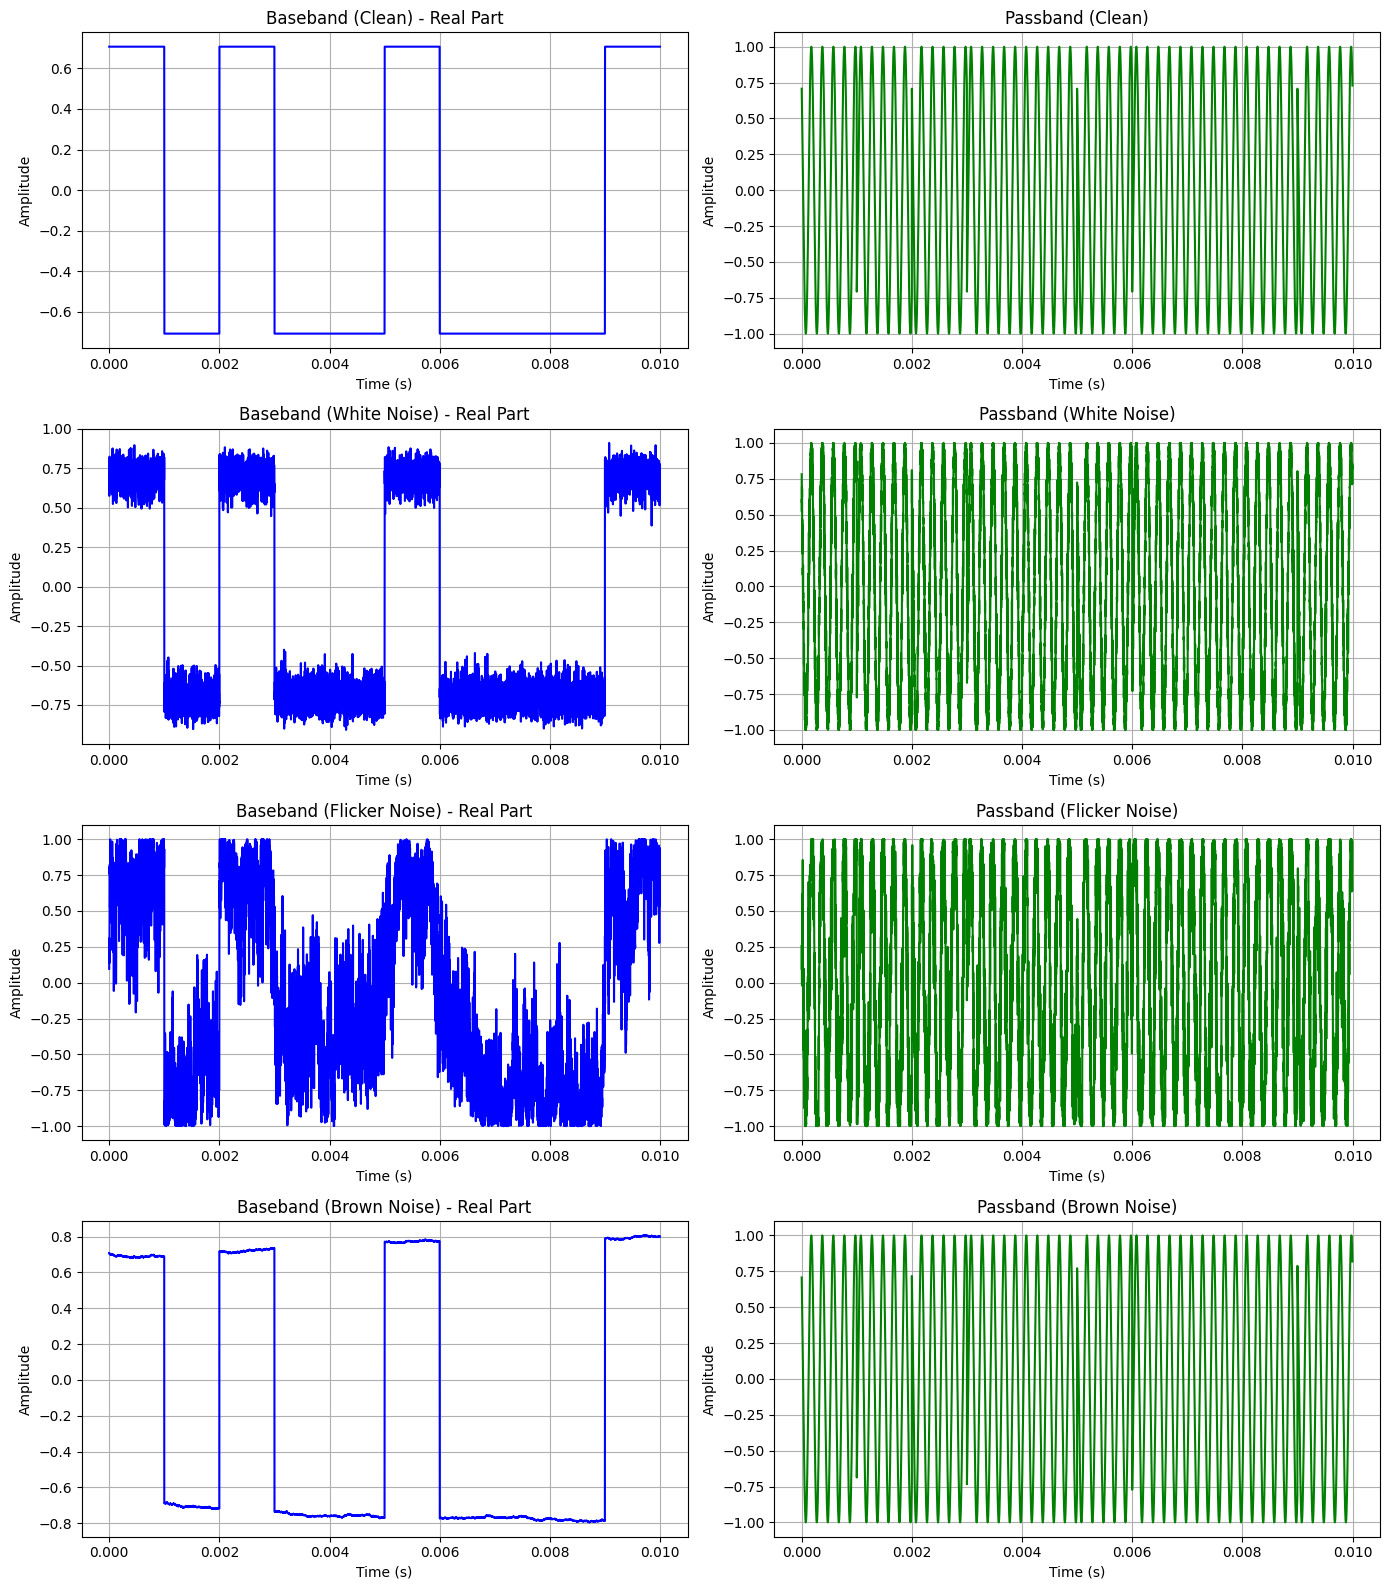

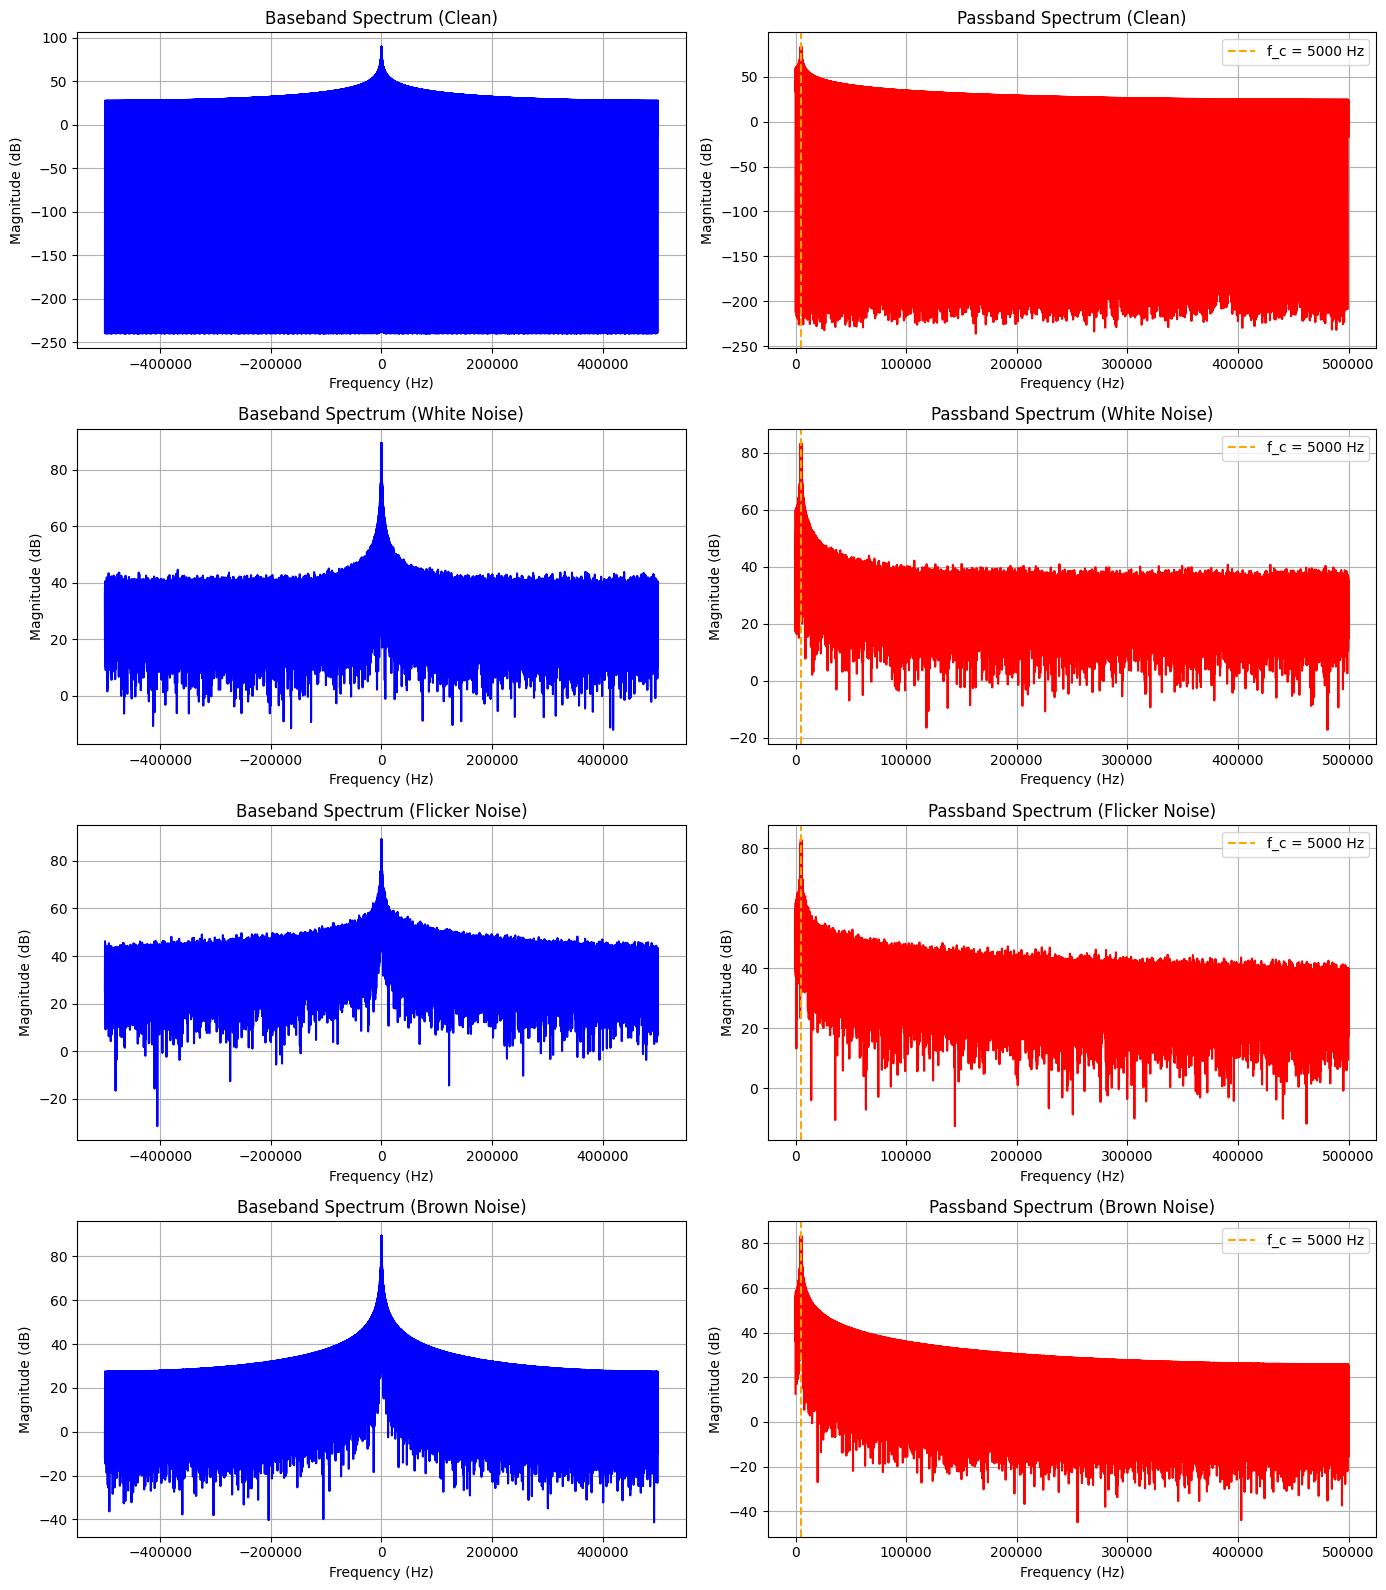

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Helper function: Generate noise
# ------------------------------
def generate_noise(n, noise_type="white", scale=1.0):
    """
    Generate a noise time series of length n with specified spectral density.
    
    noise_type: "white", "flicker", or "brown"
      - White: flat power spectral density (Gaussian noise).
      - Flicker: ~1/f noise.
      - Brown: ~1/f² noise.
      
    scale: scaling factor (in radians) to set the phase noise level.
    """
    if noise_type == "white":
        noise = np.random.randn(n)
    elif noise_type == "flicker":
        # Create pink noise: generate white noise in frequency domain then scale by 1/sqrt(f)
        X = np.fft.rfft(np.random.randn(n))
        freqs = np.fft.rfftfreq(n)
        scaling = np.where(freqs == 0, 1.0, 1/np.sqrt(freqs))
        X = X * scaling
        noise = np.fft.irfft(X, n)
    elif noise_type == "brown":
        # Brown noise: random walk (cumulative sum of white noise), normalized
        noise = np.cumsum(np.random.randn(n))
        noise = noise / np.std(noise)
    else:
        noise = np.random.randn(n)
    return noise * scale

# ------------------------------
# 1. Simulation Parameters & BPSK Generation (Baseband)
# ------------------------------
num_symbols = 200                   # Number of BPSK symbols
samples_per_symbol = 1000           # Oversampling factor (1000 samples per symbol)
symbol_rate = 1e3                   # 1 kSymbol per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency (Hz)
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping: bit 0 -> (1+1j)/sqrt2, bit 1 -> (-1-1j)/sqrt2 (unit energy)
constellation_scaling = 1/np.sqrt(2)
symbol_mapping = {0: (1+1j)*constellation_scaling,
                  1: (-1-1j)*constellation_scaling}

# Generate random bits and create the baseband complex IQ signal.
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)  # Upsample
t = np.arange(len(baseband_signal)) * Ts  # Time vector

# ------------------------------
# 2. Create Noisy Versions of the Baseband Signal (Phase Noise)
# ------------------------------
N = len(baseband_signal)

# Define phase noise amplitude (in radians) for each type.
phase_noise_scale_white = 0.1
phase_noise_scale_flicker = 0.1
phase_noise_scale_brown = 0.1

# Generate phase noise sequences.
phi_white   = generate_noise(N, "white", scale=phase_noise_scale_white)
phi_flicker = generate_noise(N, "flicker", scale=phase_noise_scale_flicker)
phi_brown   = generate_noise(N, "brown", scale=phase_noise_scale_brown)

# Multiply baseband signal by a complex exponential to add phase noise.
bb_clean   = baseband_signal
bb_white   = baseband_signal * np.exp(1j * phi_white)
bb_flicker = baseband_signal * np.exp(1j * phi_flicker)
bb_brown   = baseband_signal * np.exp(1j * phi_brown)

# ------------------------------
# 3. Upconvert to Passband Using IQ Modulation
# ------------------------------
# Define carrier frequency.
fc = 5000  # Hz

def upconvert(rx_bb, t, fc):
    """
    Upconverts a complex baseband signal rx_bb into a real passband signal 
    using standard IQ modulation.
    """
    I_component = np.real(rx_bb)
    Q_component = np.imag(rx_bb)
    return I_component * np.cos(2*np.pi*fc*t) - Q_component * np.sin(2*np.pi*fc*t)

# Upconverted (passband) signals.
pb_clean   = upconvert(bb_clean,   t, fc)
pb_white   = upconvert(bb_white,   t, fc)
pb_flicker = upconvert(bb_flicker, t, fc)
pb_brown   = upconvert(bb_brown,   t, fc)

# ------------------------------
# 4. Frequency-Domain Analysis Functions
# ------------------------------
def compute_complex_spectrum(signal, Ts):
    """
    Compute and return frequency (two-sided) and spectrum magnitude (in dB)
    for a complex (baseband) signal.
    """
    N = len(signal)
    S = np.fft.fftshift(np.fft.fft(signal))
    freqs = np.fft.fftshift(np.fft.fftfreq(N, Ts))
    S_db = 20 * np.log10(np.abs(S) + 1e-12)
    return freqs, S_db

def compute_real_spectrum(signal, Ts):
    """
    Compute and return frequency (single-sided) and spectrum magnitude (in dB)
    for a real (passband) signal.
    """
    N = len(signal)
    S = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, Ts)
    mask = freqs >= 0
    S_db = 20 * np.log10(np.abs(S[mask]) + 1e-12)
    return freqs[mask], S_db

# Compute spectra for baseband (complex, two-sided) and passband (real, single-sided) for each condition.
freq_bb_clean, S_bb_clean   = compute_complex_spectrum(bb_clean, Ts)
freq_bb_white, S_bb_white   = compute_complex_spectrum(bb_white, Ts)
freq_bb_flicker, S_bb_flicker = compute_complex_spectrum(bb_flicker, Ts)
freq_bb_brown, S_bb_brown   = compute_complex_spectrum(bb_brown, Ts)

freq_pb_clean, S_pb_clean   = compute_real_spectrum(pb_clean, Ts)
freq_pb_white, S_pb_white   = compute_real_spectrum(pb_white, Ts)
freq_pb_flicker, S_pb_flicker = compute_real_spectrum(pb_flicker, Ts)
freq_pb_brown, S_pb_brown   = compute_real_spectrum(pb_brown, Ts)

# ------------------------------
# 5. Plotting the Results
# ------------------------------
# k defines how many time-domain samples to display.
k = 10000

# Create two figures: one for time domain and one for frequency domain.

# Figure 1: Time-Domain Comparison
fig1, axs1 = plt.subplots(4, 2, figsize=(14, 16))
conditions = ['Clean', 'White Noise', 'Flicker Noise', 'Brown Noise']
baseband_signals = [bb_clean, bb_white, bb_flicker, bb_brown]
passband_signals = [pb_clean, pb_white, pb_flicker, pb_brown]

for i in range(4):
    # Left column: Baseband signal (plot the real part only)
    axs1[i, 0].plot(t[:k], np.real(baseband_signals[i][:k]), color='blue')
    axs1[i, 0].set_title(f"Baseband ({conditions[i]}) - Real Part")
    axs1[i, 0].set_xlabel("Time (s)")
    axs1[i, 0].set_ylabel("Amplitude")
    axs1[i, 0].grid(True)
    
    # Right column: Passband signal
    axs1[i, 1].plot(t[:k], passband_signals[i][:k], color='green')
    axs1[i, 1].set_title(f"Passband ({conditions[i]})")
    axs1[i, 1].set_xlabel("Time (s)")
    axs1[i, 1].set_ylabel("Amplitude")
    axs1[i, 1].grid(True)

fig1.tight_layout()
plt.show()

# Figure 2: Frequency-Domain Comparison
fig2, axs2 = plt.subplots(4, 2, figsize=(14, 16))
# Left column: Baseband spectrum (two-sided)
# Right column: Passband spectrum (single-sided)
spectrum_data_bb = [(freq_bb_clean, S_bb_clean),
                    (freq_bb_white, S_bb_white),
                    (freq_bb_flicker, S_bb_flicker),
                    (freq_bb_brown, S_bb_brown)]
spectrum_data_pb = [(freq_pb_clean, S_pb_clean),
                    (freq_pb_white, S_pb_white),
                    (freq_pb_flicker, S_pb_flicker),
                    (freq_pb_brown, S_pb_brown)]

for i in range(4):
    freq_bb, S_bb = spectrum_data_bb[i]
    axs2[i, 0].plot(freq_bb, S_bb, color='blue')
    axs2[i, 0].set_title(f"Baseband Spectrum ({conditions[i]})")
    axs2[i, 0].set_xlabel("Frequency (Hz)")
    axs2[i, 0].set_ylabel("Magnitude (dB)")
    axs2[i, 0].grid(True)
    
    freq_pb, S_pb = spectrum_data_pb[i]
    axs2[i, 1].plot(freq_pb, S_pb, color='red')
    axs2[i, 1].set_title(f"Passband Spectrum ({conditions[i]})")
    axs2[i, 1].set_xlabel("Frequency (Hz)")
    axs2[i, 1].set_ylabel("Magnitude (dB)")
    axs2[i, 1].grid(True)
    # Mark the carrier frequency in the passband spectrum.
    axs2[i, 1].axvline(fc, color='orange', linestyle='--', label=f"f_c = {fc} Hz")
    axs2[i, 1].legend()

fig2.tight_layout()
plt.show()


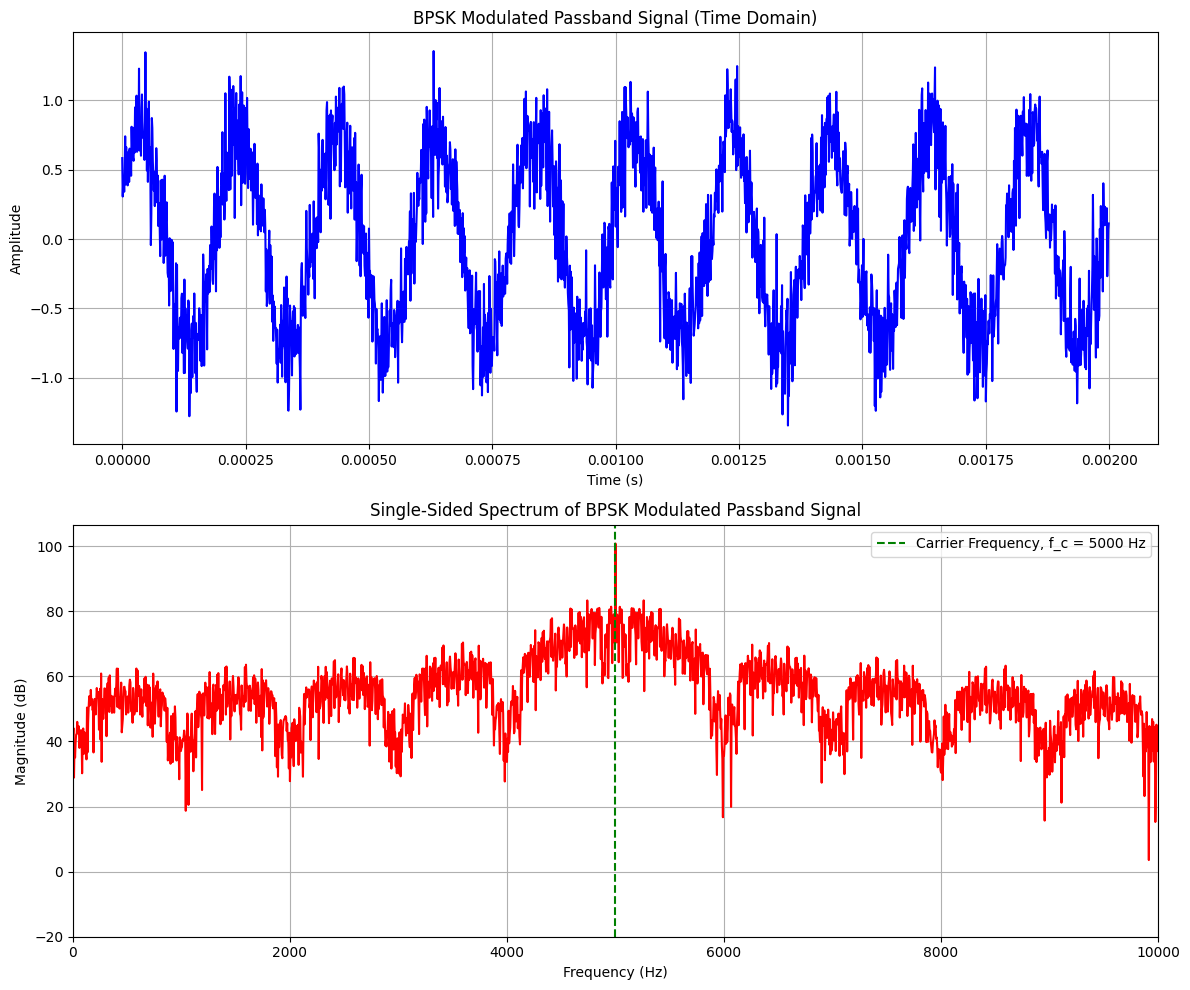

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1. Simulation Parameters and BPSK Symbol Generation
# =============================================================================
num_symbols = 200                   # Number of BPSK symbols
samples_per_symbol = 1000           # Oversampling factor: 1000 samples per symbol

# Symbol rate and derived baseband sampling frequency.
symbol_rate = 1e3                   # 1 kSymbols per second
fs = samples_per_symbol * symbol_rate  # Baseband sampling frequency in Hz
Ts = 1.0 / fs                       # Sampling interval

# BPSK mapping using the custom constellation:
# We'll map bit 0 to (1+1j)/sqrt(2) and bit 1 to (-1-1j)/sqrt(2) so that each symbol has unit energy.
constellation_scaling = 1 / np.sqrt(2)
symbol_mapping = {
    0: (1 + 1j) * constellation_scaling,
    1: (-1 - 1j) * constellation_scaling
}

# Generate a random bit stream (1 bit per symbol for BPSK) and map bits to symbols.
bits = np.random.randint(0, 2, num_symbols)
bpsk_symbols = np.array([symbol_mapping[b] for b in bits])

# =============================================================================
# 2. Upsample and Construct the Baseband IQ Signal
# =============================================================================
# Upsample by repeating each symbol 'samples_per_symbol' times.
baseband_signal = np.repeat(bpsk_symbols, samples_per_symbol)
t = np.arange(len(baseband_signal)) * Ts  # Time vector for baseband signal

# =============================================================================
# 3. Add AWGN Noise to the Baseband Signal
# =============================================================================
SNR_dB = 10                        # Signal-to-noise ratio in dB
SNR_linear = 10 ** (SNR_dB / 10)

# The average power of the normalized baseband signal is ~1.
signal_power = np.mean(np.abs(baseband_signal)**2)
noise_variance = signal_power / SNR_linear  # Variance per real dimension

# Generate complex AWGN: independent noise for in-phase and quadrature components.
noise = np.sqrt(noise_variance / 2) * (np.random.randn(len(baseband_signal)) + 1j * np.random.randn(len(baseband_signal)))
rx_baseband = baseband_signal + noise

# =============================================================================
# 4. Passband Modulation with a Pilot Carrier
# =============================================================================
# Set the carrier frequency.
fc = 5000  # Carrier frequency in Hz

# Using standard IQ modulation to obtain a real passband signal:
#   x_passband(t) = I(t)*cos(2πfc t) - Q(t)*sin(2πfc t)
I_component = np.real(rx_baseband)
Q_component = np.imag(rx_baseband)
modulated_signal = I_component * np.cos(2 * np.pi * fc * t) - Q_component * np.sin(2 * np.pi * fc * t)

# In practical systems, sometimes a pilot (or unmodulated carrier) is added to emphasize the carrier.
carrier_amplitude = 1.0  # Adjust as needed
pilot_carrier = carrier_amplitude * np.cos(2 * np.pi * fc * t)

# The final passband signal is the sum of the modulated signal and the pilot carrier.
passband_signal = modulated_signal + pilot_carrier

# =============================================================================
# 5. Frequency-Domain Analysis
# =============================================================================
# Compute the FFT of the passband signal.
N = len(passband_signal)
S = np.fft.fft(passband_signal)
freqs = np.fft.fftfreq(N, Ts)

# Keep only the positive frequencies (single-sided spectrum).
mask = freqs >= 0
freqs = freqs[mask]
S = S[mask]
S_db = 20 * np.log10(np.abs(S) + 1e-12)  # Magnitude in dB; a small constant avoids log(0).

# =============================================================================
# 6. Plotting: Time-Domain Signal and Frequency-Domain Spectrum
# =============================================================================
plt.figure(figsize=(12, 10))

# (a) Time-Domain Plot of the Passband Signal
plt.subplot(2, 1, 1)
# Plot only a short segment (e.g., first 2000 samples) for clarity.
plt.plot(t[:2000], passband_signal[:2000], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("BPSK Modulated Passband Signal (Time Domain)")
plt.grid(True)

# (b) Frequency-Domain (Single-Sided) Spectrum
plt.subplot(2, 1, 2)
plt.plot(freqs, S_db, color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Single-Sided Spectrum of BPSK Modulated Passband Signal")
plt.xlim(0, 10000)
plt.grid(True)

# Mark the carrier frequency with a vertical line.
plt.axvline(fc, color='green', linestyle='--', label=f'Carrier Frequency, f_c = {fc} Hz')
plt.legend()

plt.tight_layout()
plt.show()
